# Analysis of the MIMIC-III Dataset

## Abstract
[words here! also results!]

## Introduction

MIMIC-III (Medical Information Mart for Intensive Care III) is a large, publicly available database composed of detailed health information related to deidentified patients admitted to critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012 ([Johnson et al., 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878278/)). This database has been utilized by researchers across the globe to study patient outcomes in critical care, facilitate the development of predictive models, and support the application of machine learning techniques to analyze patient health data.

This relational database consists of 26 tables, encompassing a broad range of clinical data including detailed information such as patient demographics, vital signs, laboratory results, and diagnoses ([Johnson et al., 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878278/)). Its detail and scope have made it a valuable resource of medical research, enabling studies that span fields such as artificial intelligence, personalized medicinde, and computer science for hte prediction of health outcomes ([Rajkomar et al., 2018](https://www.nature.com/articles/s41746-018-0029-1); [Che et al., 2018](https://www.nature.com/articles/s41598-018-24271-9); [McManamay & DeRolph, 2019](https://www.nature.com/articles/sdata201917)).

This study utilizes MIMIC-III version 1.4, which is the most current version of the database at the time of analysis ([Johnson, 2016](https://doi.org/10.13026/C2XW26)). The analysis conducted in this journal explore the distribution of patient demographics, time series analysis of ICU admission, and predicting the likelihood of patient readmission. Through the use of detailed graphics and machine learning algorithms, this study aims to provide insight into patterns in critical care admission and improve patient outcomes.

## Exploratory Data Analysis and Visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from query import query_a, query_b, query_c, query_d, mapped_ethnicies
from diagnosis import mapped_diagnosis

### Age and Gender Distribution

In [4]:
df_a = query_a()
df_a['death_time'] = pd.Categorical(df_a['death_time'], categories=["death within hospital", "death within 90 days of discharge", "death not within 90 days of discharge"], ordered=True)
df_a['age'] = df_a['age'].apply(lambda x: 100 - x if x > 79 else x)

print(df_a.head(2))
df_a.info()

  gender  age     los  death_days                             death_time  \
0      F   65  3.2490           0                  death within hospital   
1      M   66  8.8143        2978  death not within 90 days of discharge   

   hospital_expire_flag  
0                     1  
1                     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52125 entries, 0 to 52124
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                52125 non-null  object  
 1   age                   52125 non-null  int64   
 2   los                   52121 non-null  float64 
 3   death_days            52125 non-null  int64   
 4   death_time            52125 non-null  category
 5   hospital_expire_flag  52125 non-null  int64   
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 2.0+ MB


According to overview of the data, we have gender and age information on patients, along with their length of stay and how long after hospital ICU admission their reported death was. The hospital expire flag notes whether the patient died within the hospital care (1) or outside of the hospital care (0). There are a total of 52,125 patient records in this set. Patients who were above the age of 79 at admission have had their ages obsurced for HIPAA and have an age of 300 years; these patient records were removed during the query process. The age column was adjusted to account for records with ages above 79 being removed from analysis; any ages, then, recorded above 79 are erroneous and must be adjusted. For instance, a 91-year-old patient would not have their age recorded as 91, but as 300. Likely, this means that there was a computing error in the year of birth and admittance year by a difference of 100, meaning this patient should be 9-years-old.

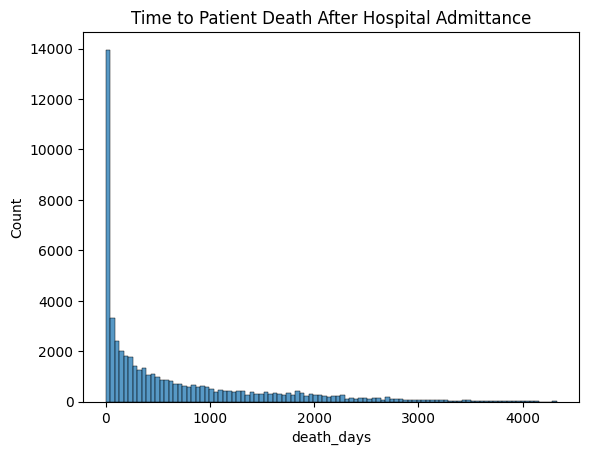

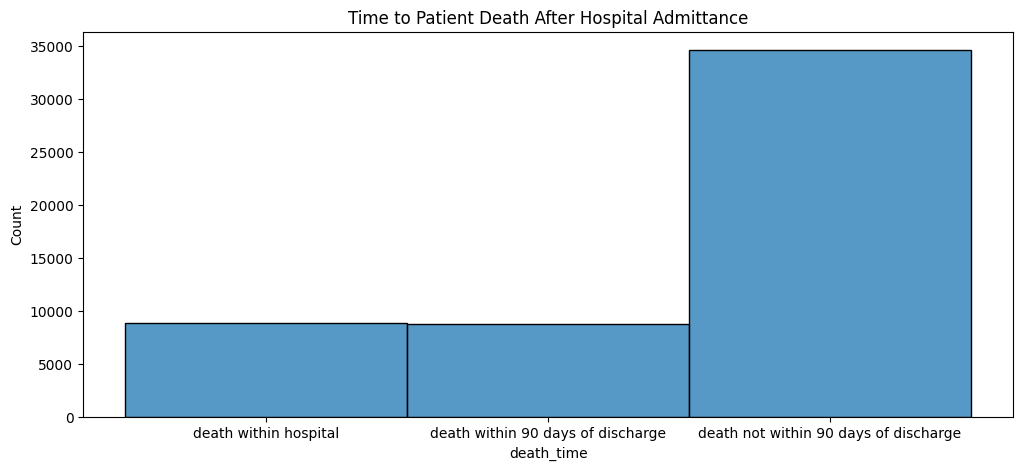

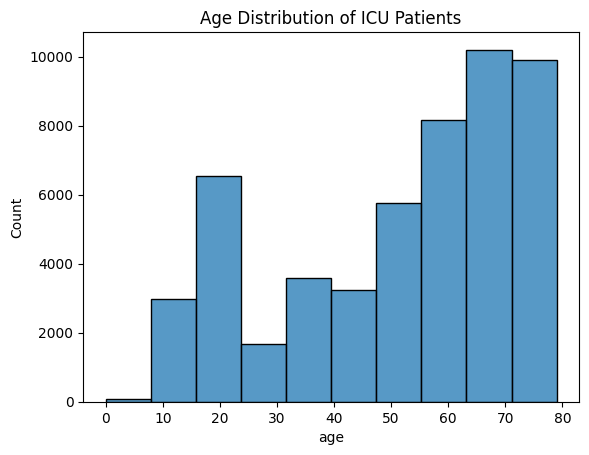

|       |        age |
|:------|-----------:|
| count | 52125      |
| mean  |    51.8222 |
| std   |    20.9439 |
| min   |     0      |
| 25%   |    36      |
| 50%   |    58      |
| 75%   |    69      |
| max   |    79      |


In [38]:
sns.histplot(df_a['death_days'], bins=100)
plt.title('Time to Patient Death After Hospital Admittance')
plt.show()

f, ax = plt.subplots(figsize = (12,5))

sns.histplot(df_a['death_time'])
plt.title('Time to Patient Death After Hospital Admittance')
plt.show()

sns.histplot(df_a['age'], bins=10)
plt.title('Age Distribution of ICU Patients')
plt.show()

print(df_a['age'].describe().to_markdown())

The time to patient death plot is skewed right, suggesting that the vast majority of patients admitted to the ICU do not die within, or even within 250 days of hospital admittance. The following plot uses the time to death, which is either within the hospital, within 90 days of hospital admittance, or greater than 90 days of hospital admittance. This supports the conclusion that the majority of patients are not dying within the hospital. However, in terms of age, many of the patients admitted to the ICU are considered older adults. Half of the patients admitted to the ICU are older than 58 years of age; note that this does not account for patients older than 79 years of age at admittance, as they were removed for this analysis.

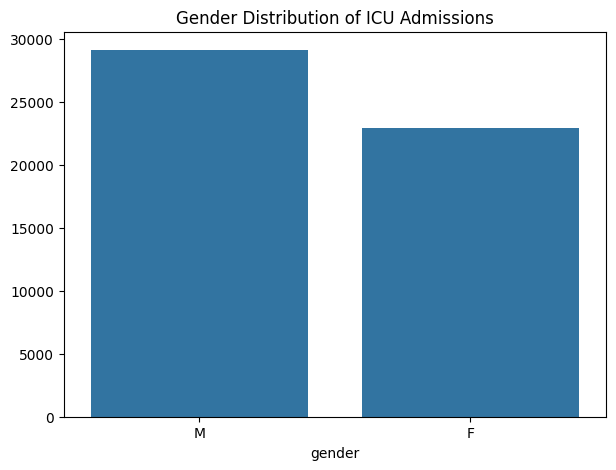

| gender   |   count |
|:---------|--------:|
| M        |   29149 |
| F        |   22976 |


In [6]:
f, ax = plt.subplots(figsize = (7,5))
gender_counts = df_a['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution of ICU Admissions')
plt.show()

print(df_a['gender'].value_counts().to_markdown())

The majority of the patients admitted to the ICU are male (55.92%).

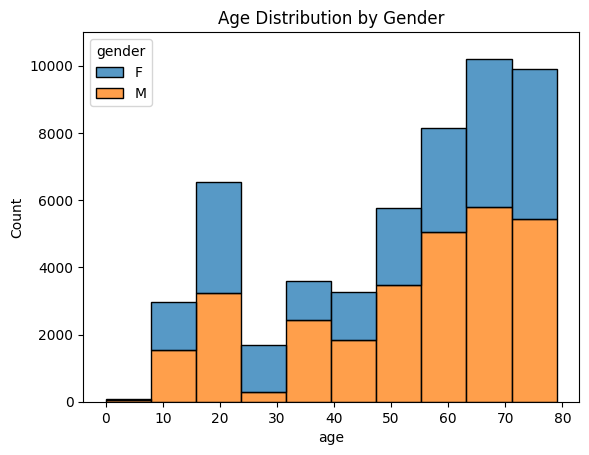

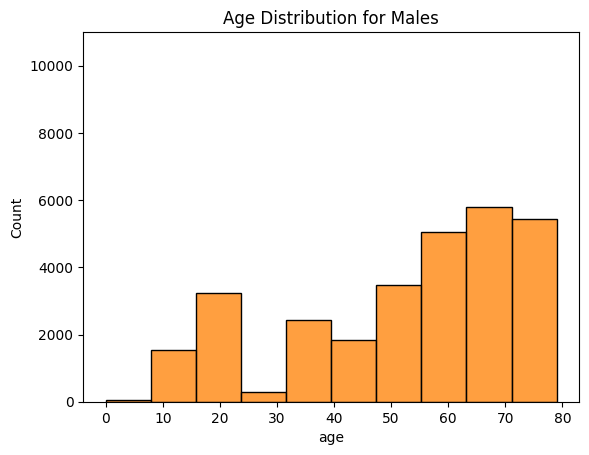

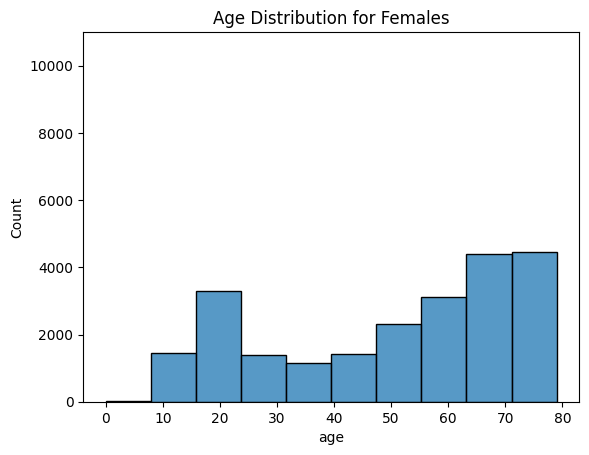

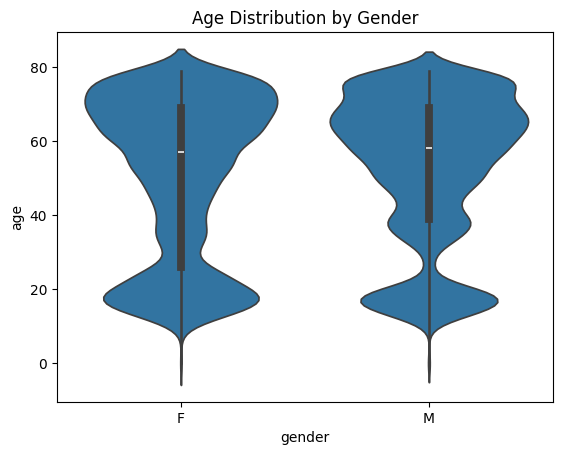

gender                F             M
age count  22976.000000  29149.000000
    mean      50.489511     52.872723
    std       21.911637     20.086443
    min        0.000000      0.000000
    25%       26.000000     39.000000
    50%       57.000000     58.000000
    75%       69.000000     69.000000
    max       79.000000     79.000000

In [49]:
sns.histplot(data=df_a, x='age', hue='gender', multiple='stack', bins=10)
plt.title('Age Distribution by Gender')
plt.ylim(0,11000)
plt.show()

sns.histplot(data=df_a[df_a['gender'] == "M"], x='age', bins=10, color = '#ff7f00')
plt.title('Age Distribution for Males')
plt.ylim(0,11000)
plt.show()

sns.histplot(data=df_a[df_a['gender'] == "F"], x='age', bins=10)
plt.title('Age Distribution for Females')
plt.ylim(0,11000)
plt.show()

sns.violinplot(x='gender', y='age', data=df_a)
plt.title('Age Distribution by Gender')
plt.show()

df_a[['gender', 'age']].groupby('gender').describe().transpose()

The age distribution of patients by gender suggests that on average, males are older when admitted to the ICU. It is worthwhile to note that the 20-30 year old age group has a peak in admittance along with the older adults (>60 years of age).

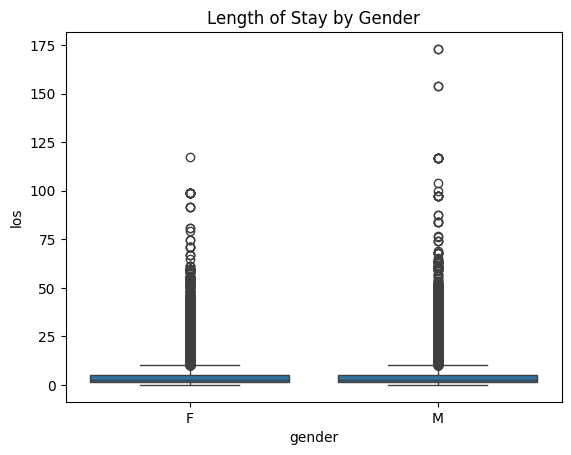

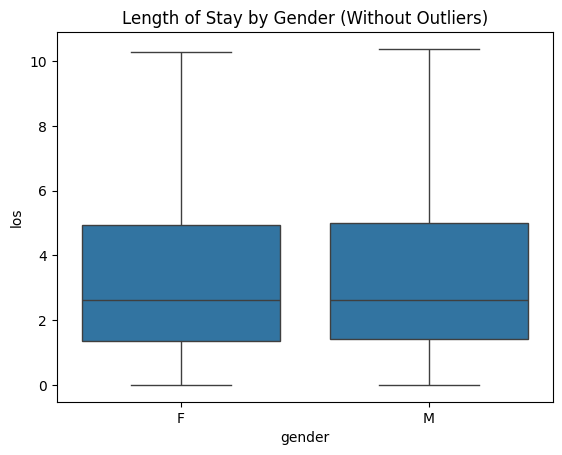

gender                F             M
los count  22976.000000  29145.000000
    mean       4.793814      4.914960
    std        7.091207      7.552335
    min        0.000100      0.000200
    25%        1.370800      1.422200
    50%        2.610000      2.633800
    75%        4.937400      5.005500
    max      117.335100    173.072500

In [9]:
sns.boxplot(x='gender', y='los', data=df_a)
plt.title('Length of Stay by Gender')
plt.show()

sns.boxplot(x='gender', y='los', data=df_a, showfliers = False)
plt.title('Length of Stay by Gender (Without Outliers)')
plt.show()

df_a[['gender', 'los']].groupby('gender').describe().transpose()

These boxplots suggest that males tend to have a longer stay at the ICU. This may be due to males being the majority of older patients or potentially having longer stays in the Neonatal ICU, as premature infants are more likely to be male ([Garland et al., 2013](https://www.nature.com/articles/pr201150); [Peacock et al., 2012](https://www.nature.com/articles/pr201150)). It is of note that these differences between male and female admittances to the ICU were not statistically significant.

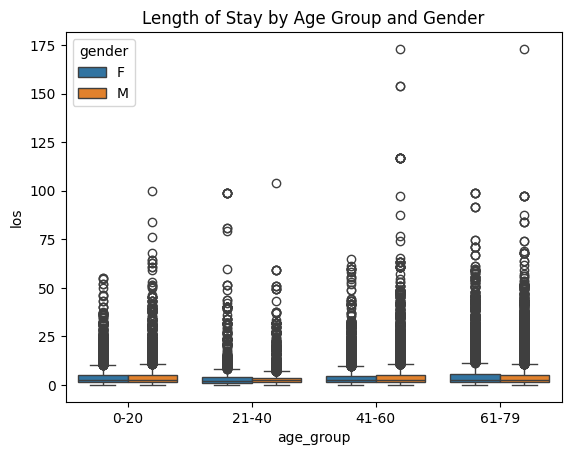

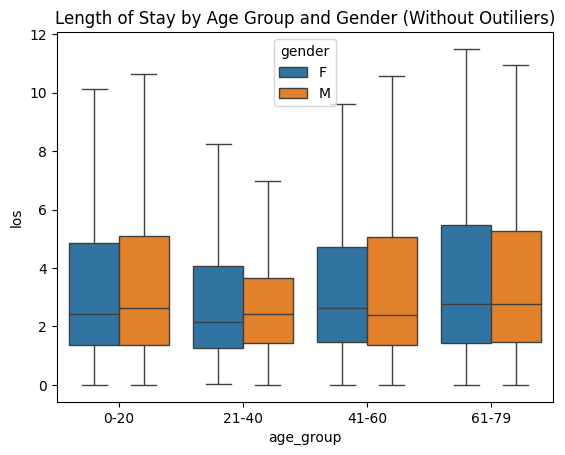

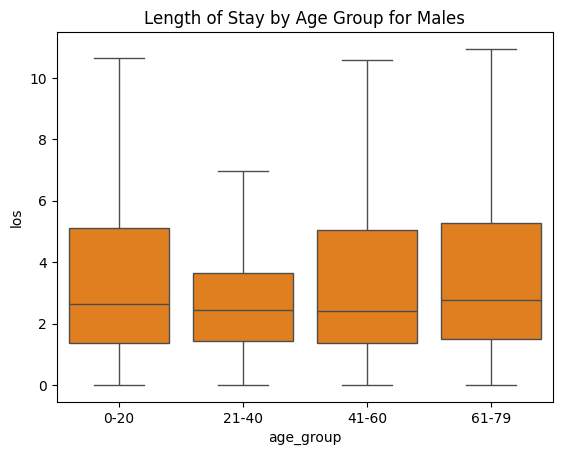

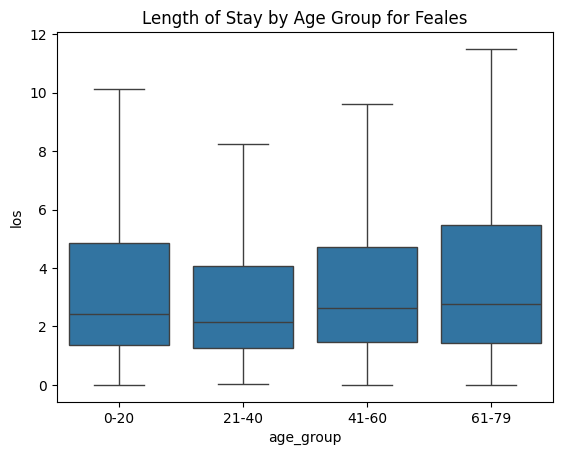

In [52]:
df_a['age_group'] = pd.cut(df_a['age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-79'])
sns.boxplot(x='age_group', y='los', hue='gender', data=df_a)
plt.title('Length of Stay by Age Group and Gender')
plt.show()

sns.boxplot(x='age_group', y='los', hue='gender', data=df_a, showfliers = False)
plt.title('Length of Stay by Age Group and Gender (Without Outiliers)')
plt.show()

sns.boxplot(x='age_group', y='los', data=df_a[df_a['gender'] == "M"], showfliers = False, color = '#ff7f00')
plt.title('Length of Stay by Age Group for Males')
plt.show()

sns.boxplot(x='age_group', y='los', data=df_a[df_a['gender'] == "F"], showfliers = False)
plt.title('Length of Stay by Age Group for Feales')
plt.show()

The length of stay does not vary signficantly between the presented age groups. However, there are minor differences in length of stay between the younger patients (<61 years of age), who appear to have a trend for shorter ICU stay.

### Demographic Analysis

In [91]:
df_b = query_b()
df_b.dropna()
df_b = df_b.drop_duplicates()

df_b['death_time'] = pd.Categorical(df_b['death_time'], categories=["death within hospital", "death within 90 days of discharge", "death not within 90 days of discharge"], ordered=True)
df_b['death_time'] = np.where(df_b['death_days'].isna(), "death not within 90 days of discharge", df_b['death_time'])

df_b['age'] = df_b['age'].apply(lambda x: 100 - x if x > 79 else x)

print(df_b.head(2))
df_b.info()

  gender age insurance      religion marital_status           ethnicity  \
0      F  65  Medicare      CATHOLIC      SEPARATED  HISPANIC OR LATINO   
1      M  40  Medicaid  UNOBTAINABLE         SINGLE               WHITE   

                  diagnosis     los  death_days  \
0                   DYSPNEA  3.2490         0.0   
1  SEPSIS;PILONIDAL ABSCESS  3.2788         NaN   

                              death_time  hospital_expire_flag  
0                  death within hospital                     1  
1  death not within 90 days of discharge                     0  
<class 'pandas.core.frame.DataFrame'>
Index: 113948 entries, 0 to 116425
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                113948 non-null  object 
 1   age                   113948 non-null  object 
 2   insurance             113948 non-null  object 
 3   religion              113423 non-null  object 
 4   ma

This query includes new information, including insurance type, religion, marital status, self-reported ethnicity, and ICU diagnosis. This data allows for analysis on patient demographics and admission diagnoses.

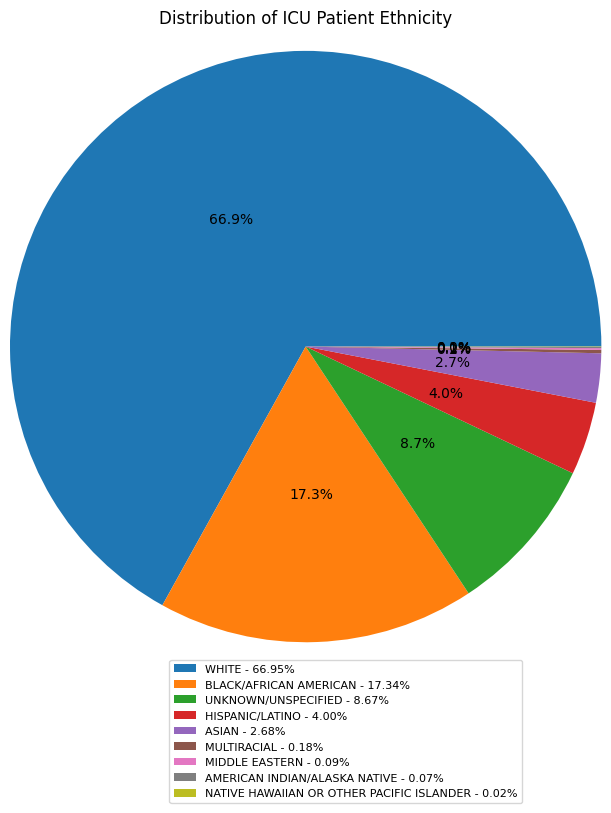

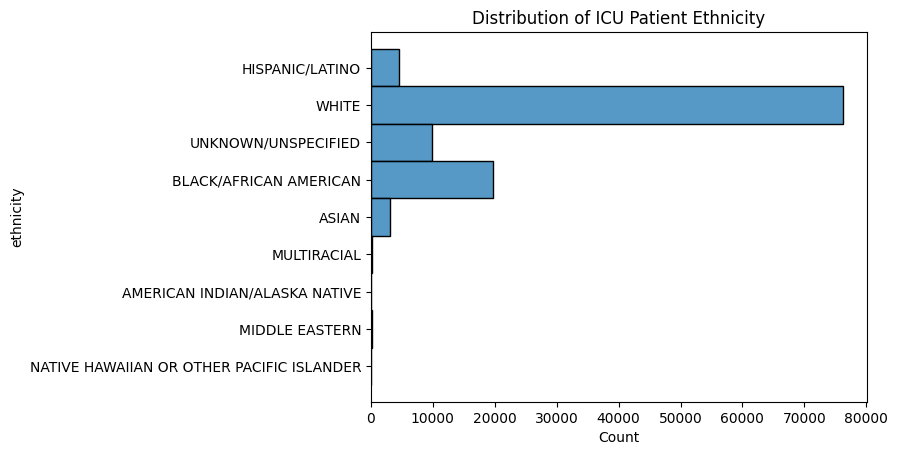

In [92]:
df_b['ethnicity'] = mapped_ethnicies(df_b['ethnicity'])

eth_counts = df_b['ethnicity'].value_counts()
eth_labels = eth_counts.index
eth_percentages = eth_counts / eth_counts.sum() * 100

f, ax = plt.subplots()
patches, texts, autotexts = ax.pie(eth_counts, labels = None, autopct='%1.1f%%', pctdistance=0.5, radius = 2)
legend_labels = [f'{label} - {percentage:.2f}%' for label, percentage in zip(eth_labels, eth_percentages)]
plt.title(label = "Distribution of ICU Patient Ethnicity", pad = 20, y = 1.3)
plt.legend(patches, legend_labels, loc='lower right', fontsize=8, bbox_to_anchor=(1.1,-.75))
plt.show()

sns.histplot(y = df_b['ethnicity'])
plt.title('Distribution of ICU Patient Ethnicity')
plt.show()

The majority of patients admitted to the ICU are White (67.0%) followed by Black/African American (17.3%) patients. Most patients did not report having a Hispanic/Latino background.

The ethnic distribution of Boston's population as of 2022 is 43% White followed by 20% Black/African American ([Census Reporter, 2024](https://censusreporter.org/profiles/16000US2507000-boston-ma/)). Since the distribution of patient ethnicity does not accurately reflect the true ethnic composition of Boston, it is likely that the higher proportion of White patients is due to a greater incidence of life-threatening diseases in this group. For instance, White patients are more likely to contract skin cancer compared to other ethnicities ([American Cancer Society, 2024](https://www.cancer.org/cancer/types/melanoma-skin-cancer/about/key-statistics.html)).

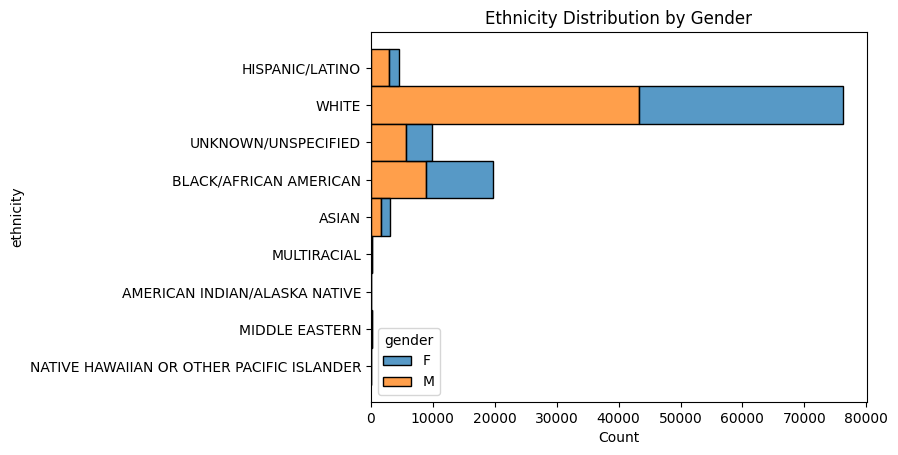

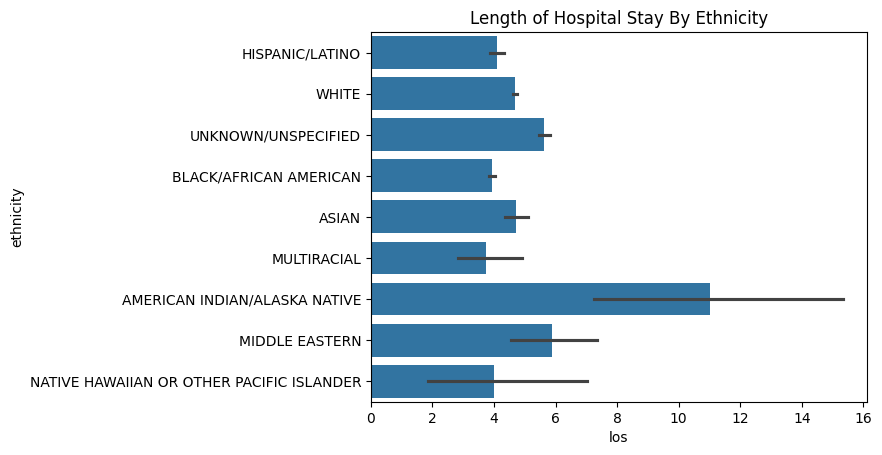

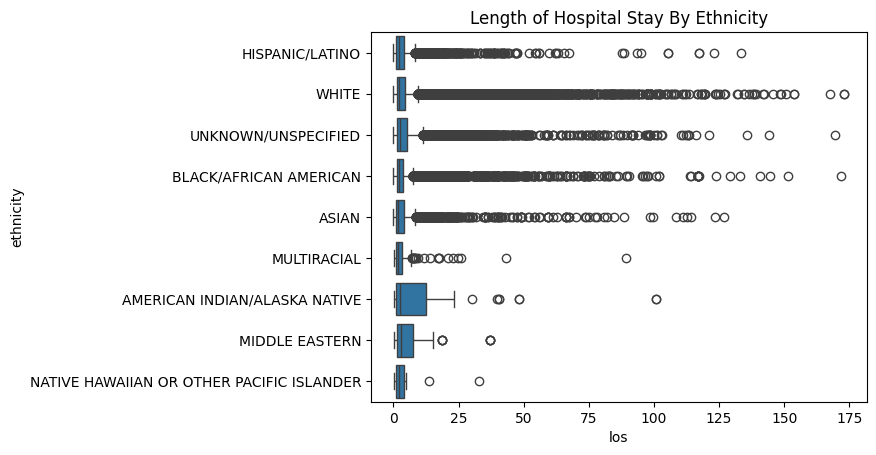

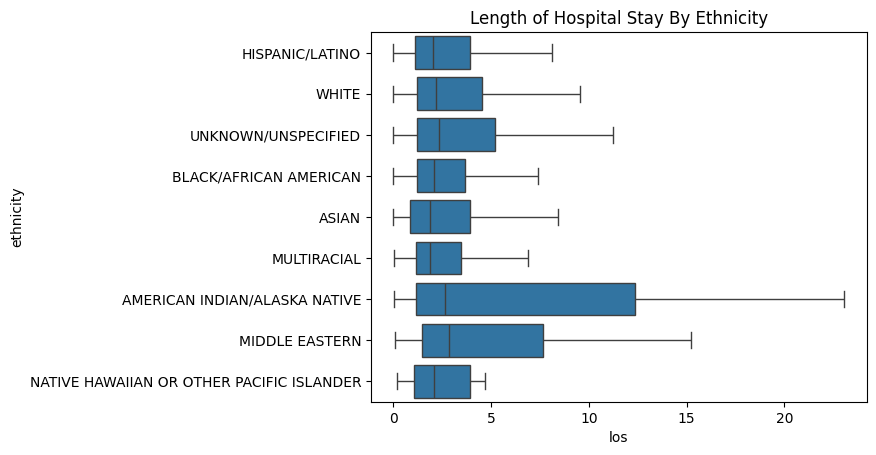

ethnicity  AMERICAN INDIAN/ALASKA NATIVE        ASIAN  BLACK/AFRICAN AMERICAN  \
los count                      75.000000  3058.000000            19757.000000   
    mean                       11.009259     4.712255                3.929395   
    std                        19.110542    10.297609                7.715912   
    min                         0.031500     0.001000                0.002500   
    25%                         1.141350     0.864400                1.183900   
    50%                         2.616700     1.875100                2.076600   
    75%                        12.357400     3.908750                3.678800   
    max                       100.785700   126.826100              171.622700   

ethnicity  HISPANIC/LATINO  MIDDLE EASTERN  MULTIRACIAL  \
los count      4557.000000      108.000000   208.000000   
    mean          4.086078        5.870622     3.734227   
    std           7.713842        7.673525     7.718533   
    min           0.001900        0.091800     0.022700   
    25%           1.107100        1.442400     1.134700   
    50%           2.013000        2.860900     1.875200   
    75%           3.905700        7.659400     3.455000   
    max         133.254200       36.947900    89.331900   

ethnicity  NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  UNKNOWN/UNSPECIFIED  \
los count                                  23.000000          9869.000000   
    mean                                    3.985683             5.630186   
    std                                     6.836700            10.375100   
    min                                     0.160900             0.001400   
    25%                                     1.055450             1.195800   
    50%                                     2.077400             2.349200   
    75%                                     3.917400             5.212400   
    max                                    32.679800           169.420200   

ethnicity         WHITE  
los count  76284.000000  
    mean       4.682187  
    std        8.268430  
    min        0.000100  
    25%        1.188050  
    50%        2.197100  
    75%        4.531500  
    max      173.072500

In [93]:
sns.histplot(data=df_b, y='ethnicity', hue='gender', multiple='stack')
plt.title('Ethnicity Distribution by Gender')
plt.show()

sns.barplot(y='ethnicity', x='los', data=df_b)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='los', data=df_b)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='los', data=df_b, showfliers = False)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

df_b[['ethnicity', 'los']].groupby('ethnicity').describe().transpose()

The distribution of patient ethnicity was depicted by gender. There were no significant trends between men or women of a certain ethnicity being more present in the ICU.

Regarding the length of stay by patient ethnicity, there was no significant difference in the median length of stay, but several groups exhibited a longer length of stay compared to others. For example, the length of stay distribution for American Indian/Alaska Native patients are heavily right-skewed, meaning there were several extreme instances of longer stays. In particular, the average length of stay for an American Indian/Alaska Native patient was just over 11 days and 25% of patients had a length of stay between 12 and 100 days within this group. It is worthwhile to remember that each group exhibited several outliers that pull the length of stay distribution rightward.

Compared to a histogram with error bars, a boxplot is a more representative way to display the data as quartile measurements and robust statistics such as the median can be immediately determined. This allows for an easier understanding of the data presented.

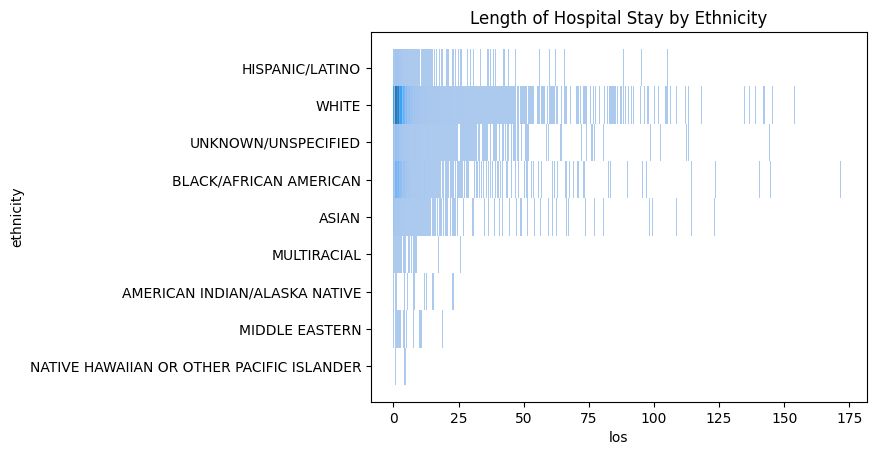

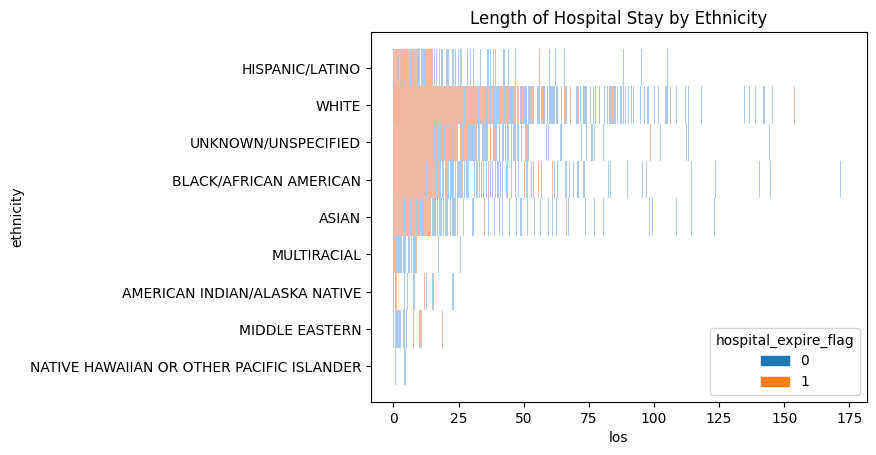

In [94]:
sns.histplot(data=df_b, y='ethnicity', x = 'los')
plt.title('Length of Hospital Stay by Ethnicity')
plt.show()

ax = sns.histplot(data=df_b, y='ethnicity', x = 'los', hue = 'hospital_expire_flag', multiple='stack')
sns.move_legend(ax, loc = 'lower right')
plt.title('Length of Hospital Stay by Ethnicity')
plt.show()

The above histograms display the frequency of each length of stay value across patient ethnicities. Additionally, the second plot describes whether the patient died within the care of the hospital or outside of the hospital. From the second plot, it is clear that most patients who die within the hospital have a shorter length of stay. This suggests that the diseases faced by these individuals were life-ending or untreatable at the point the patient was admitted to the ICU.

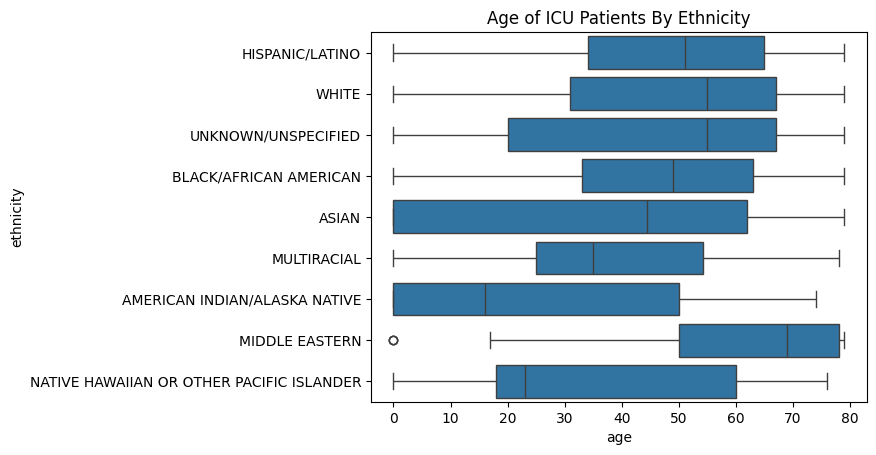

ethnicity   AMERICAN INDIAN/ALASKA NATIVE  ASIAN  BLACK/AFRICAN AMERICAN  \
age count                              75   2950                   19486   
    unique                             21     69                      69   
    top                                 0      0                       0   
    freq                               33    848                     965   

ethnicity   HISPANIC/LATINO  MIDDLE EASTERN  MULTIRACIAL  \
age count              4537             107          196   
    unique               69              23           50   
    top                   0              79            0   
    freq                404              24           29   

ethnicity   NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER  UNKNOWN/UNSPECIFIED  \
age count                                          23                 9606   
    unique                                         14                   69   
    top                                            23                    0   
    freq                                            6                 1059   

ethnicity   WHITE  
age count   72021  
    unique     70  
    top         0  
    freq     5032

In [99]:
sns.boxplot(y='ethnicity', x='age', data=df_b)
plt.title('Age of ICU Patients By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='age', data=df_b, showfliers = False)
plt.title('Age of ICU Patients By Ethnicity')
plt.show()

df_b[['ethnicity', 'age']].groupby('ethnicity').describe().transpose()

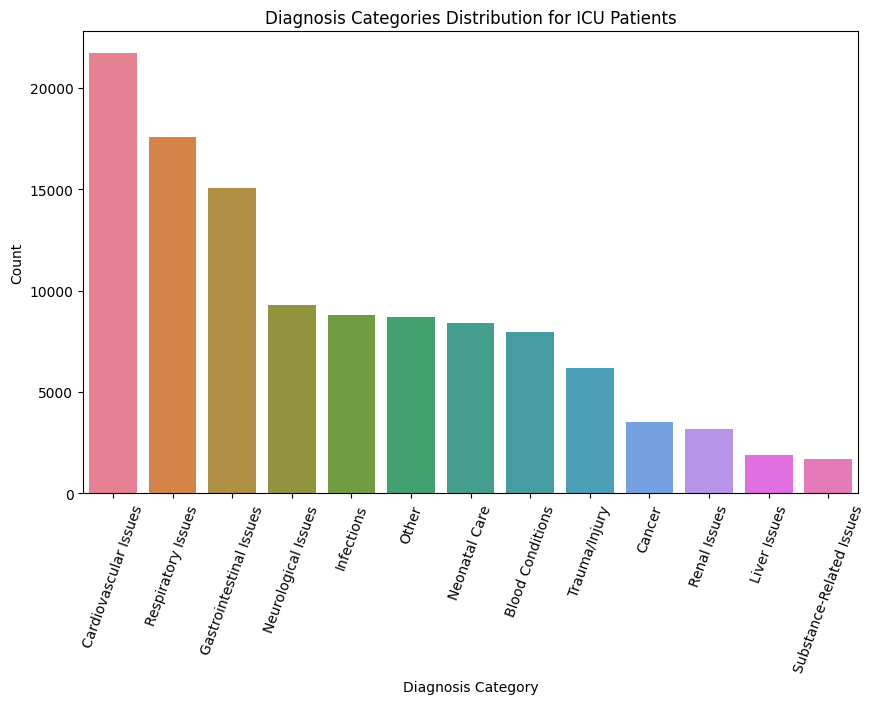

In [65]:
df_b['diagnosis_category'] = mapped_diagnosis(df_b['diagnosis'])
category_counts = df_b['diagnosis_category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue = category_counts.index)
plt.title('Diagnosis Categories Distribution for ICU Patients')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

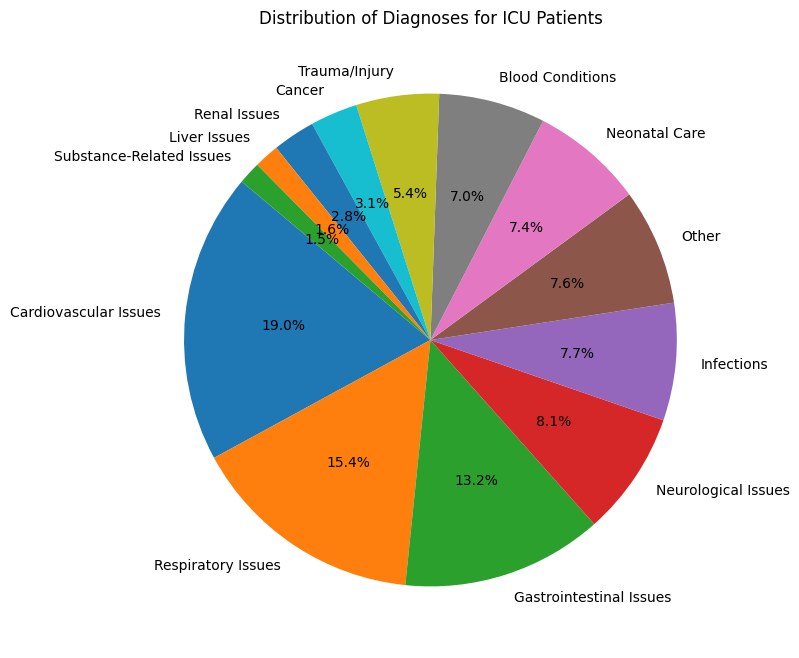

In [26]:
diagnosis_percentages = category_counts / category_counts.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnoses for ICU Patients')
plt.show()

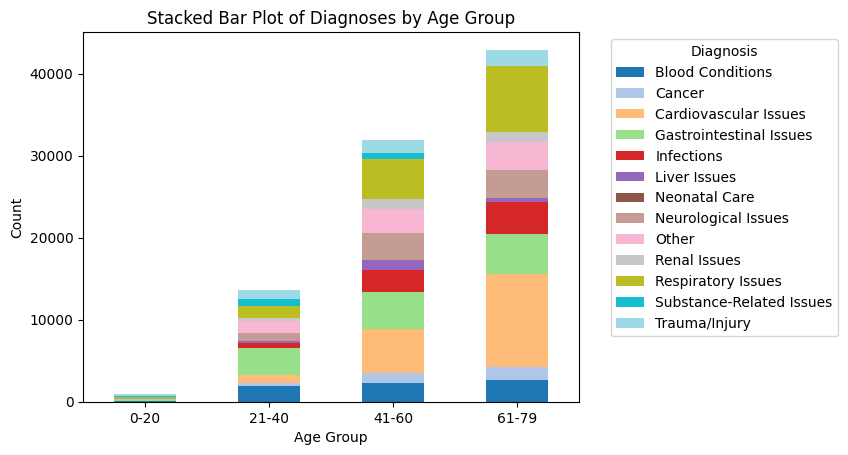

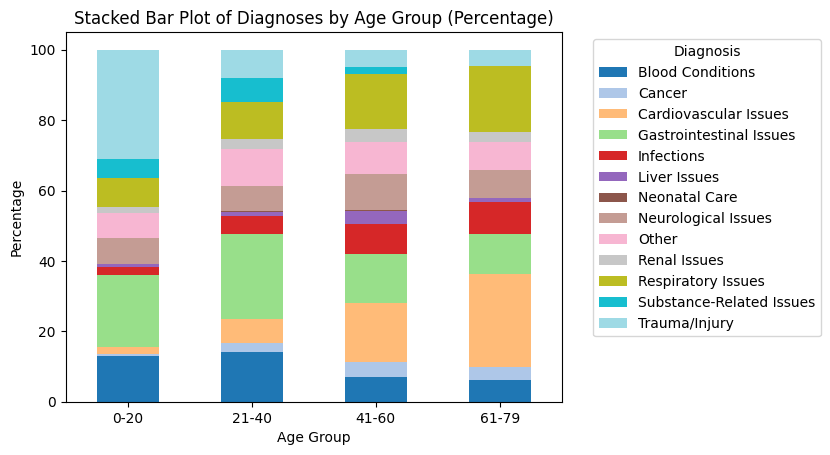

In [76]:
df_b['age_group'] = pd.cut(df_b['age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-79'])
age_diagnosis_counts = df_b.groupby(['age_group', 'diagnosis_category'], observed = False).size().unstack().fillna(0)
age_diagnosis_percents = age_diagnosis_counts.div(age_diagnosis_counts.sum(axis=1), axis=0) * 100

age_diagnosis_counts.plot(kind='bar', stacked=True, colormap = 'tab20')
plt.title('Stacked Bar Plot of Diagnoses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_diagnosis_percents.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Stacked Bar Plot of Diagnoses by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

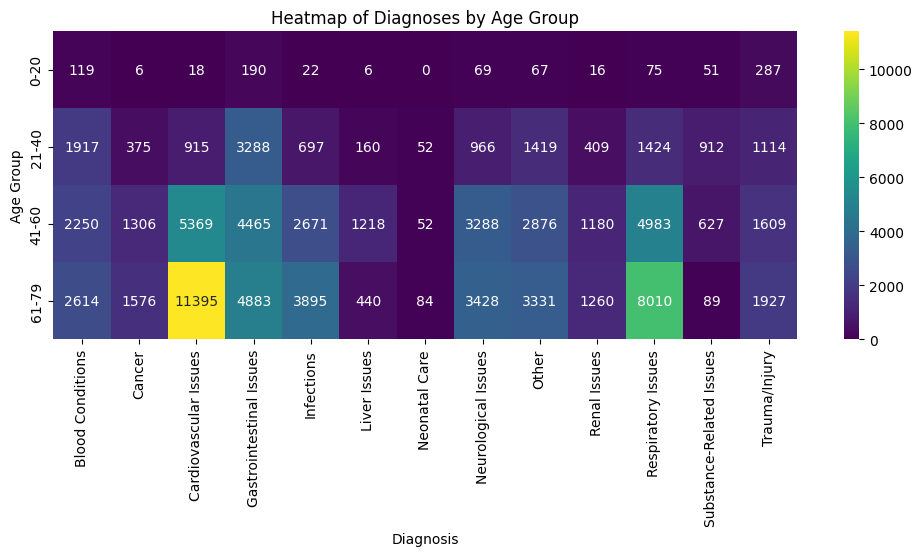

In [28]:
heatmap_data = df_b.pivot_table(index='age_group', columns='diagnosis_category', aggfunc='size', fill_value=0, observed = False)

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Diagnoses by Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group')
plt.show()

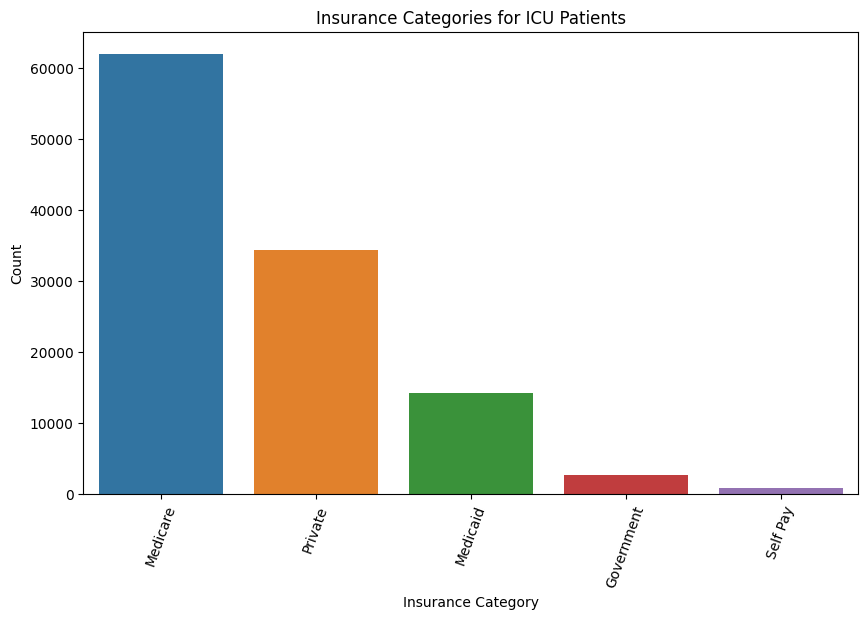

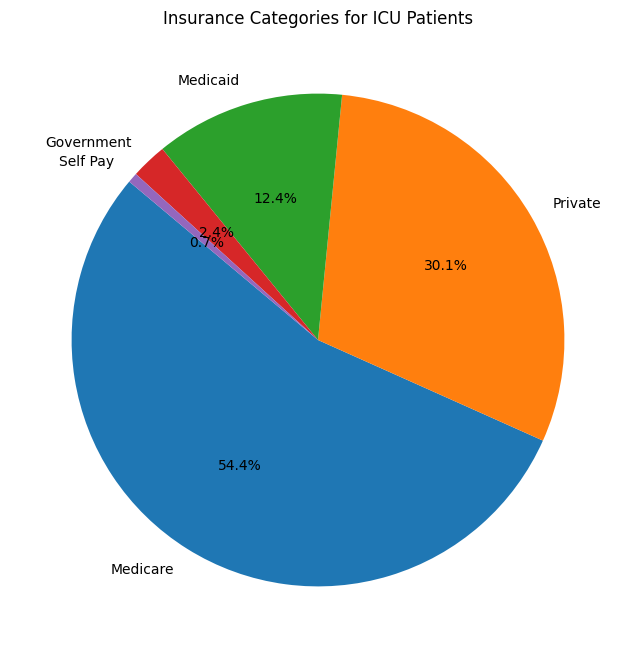

In [61]:
insurance_counts = df_b['insurance'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=insurance_counts.index, y=insurance_counts.values, hue = insurance_counts.index)
plt.title('Insurance Categories for ICU Patients')
plt.xlabel('Insurance Category')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Insurance Categories for ICU Patients')
plt.show()

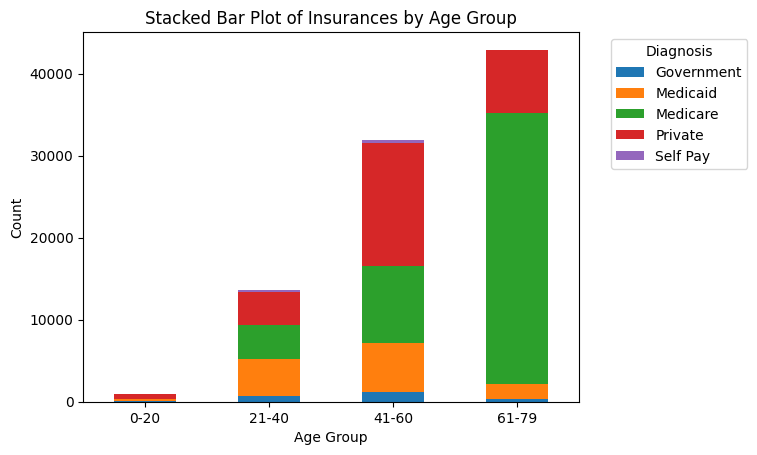

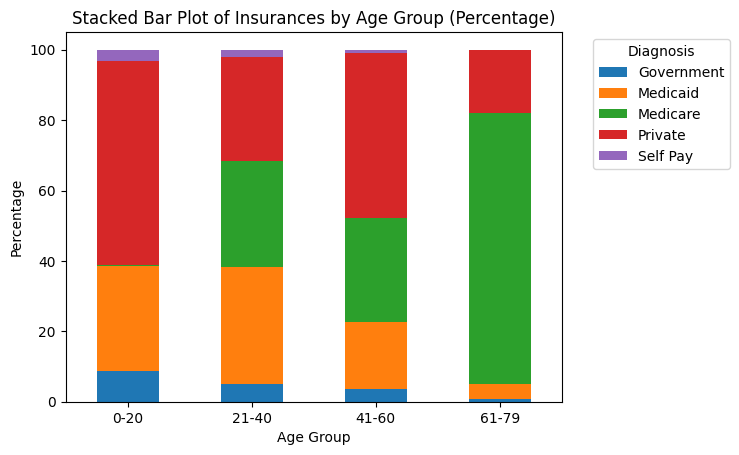

In [69]:
age_insurance_counts = df_b.groupby(['age_group', 'insurance'], observed = False).size().unstack().fillna(0)
age_insurance_percents = age_insurance_counts.div(age_insurance_counts.sum(axis=1), axis=0) * 100

age_insurance_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Insurances by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_insurance_percents.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Insurances by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

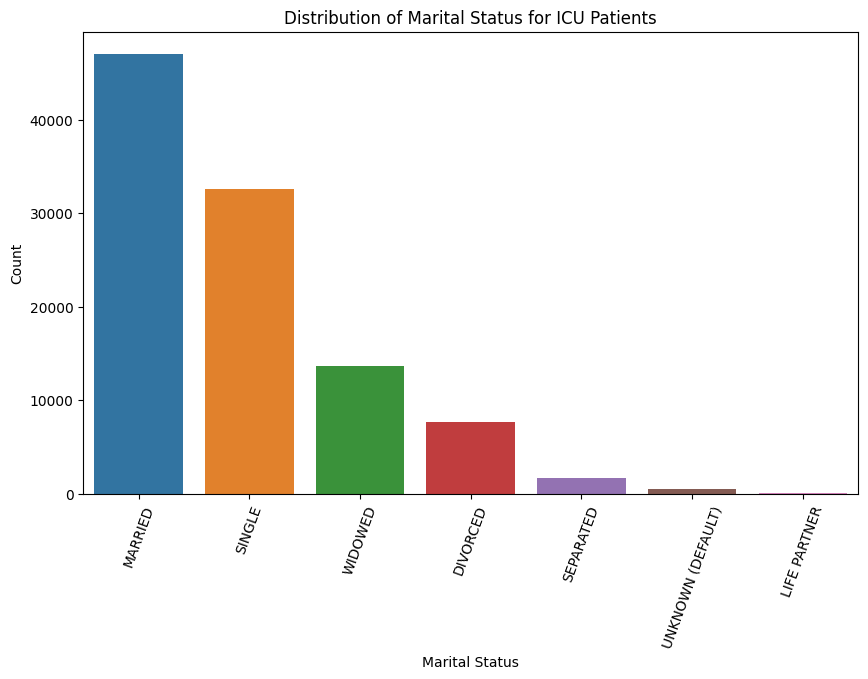

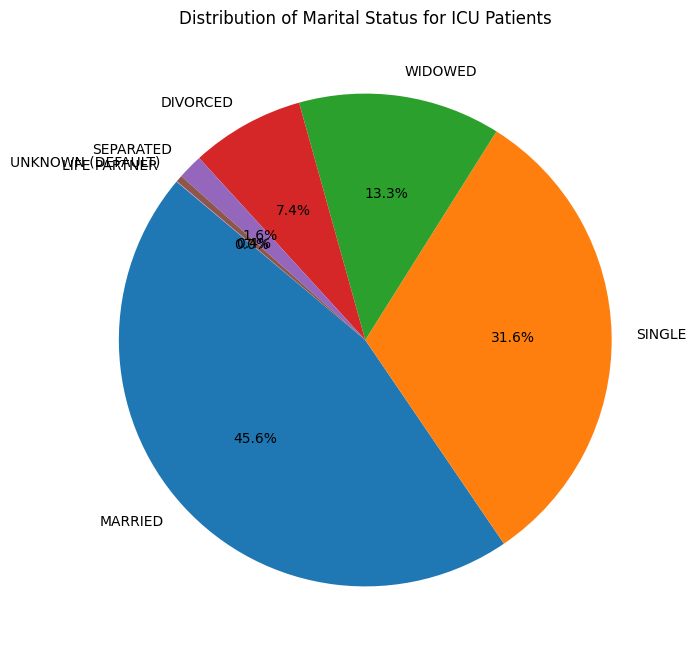

In [70]:
marital_counts = df_b['marital_status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=marital_counts.index, y=marital_counts.values, hue = marital_counts.index)
plt.title('Distribution of Marital Status for ICU Patients')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Marital Status for ICU Patients')
plt.show()

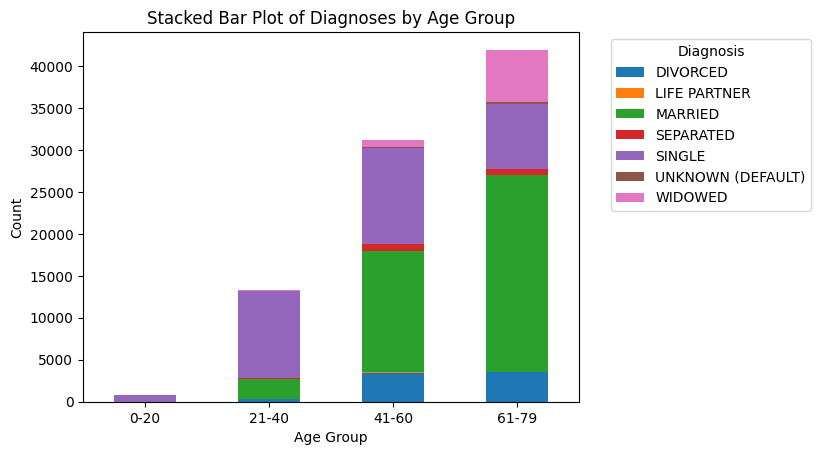

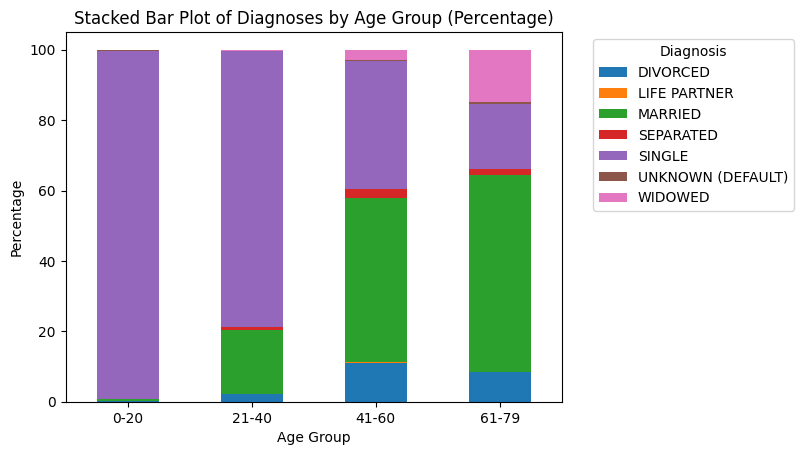

In [71]:
age_marital_counts = df_b.groupby(['age_group', 'marital_status'], observed = False).size().unstack().fillna(0)
age_marital_percents = age_marital_counts.div(age_marital_counts.sum(axis=1), axis=0) * 100

age_marital_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Diagnoses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_marital_percents.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Diagnoses by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

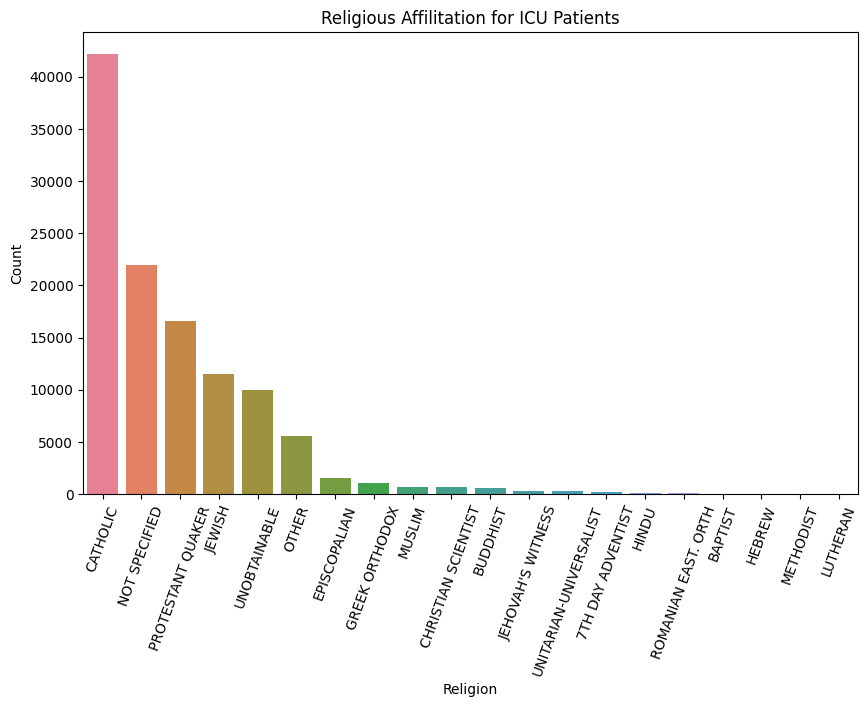

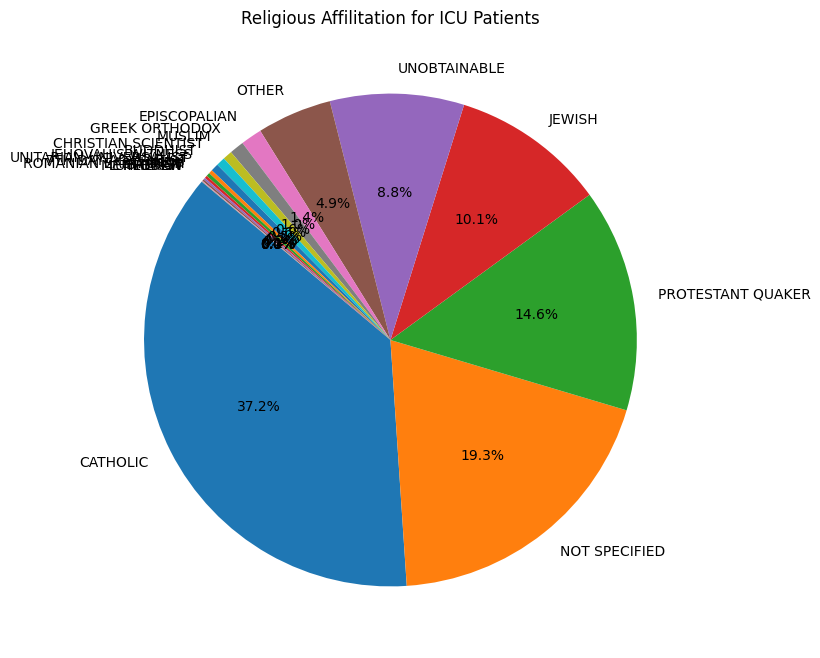

In [58]:
religion_counts = df_b['religion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=religion_counts.index, y=religion_counts.values, hue = religion_counts.index)
plt.title('Religious Affilitation for ICU Patients')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Religious Affilitation for ICU Patients')
plt.show()

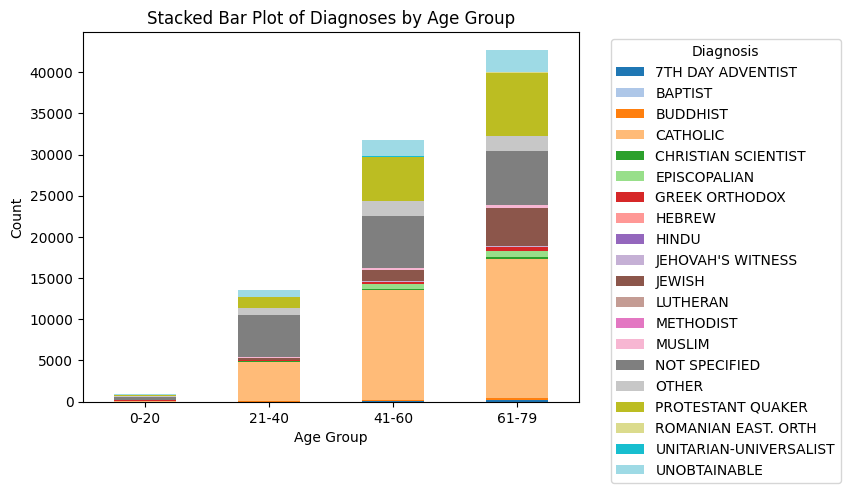

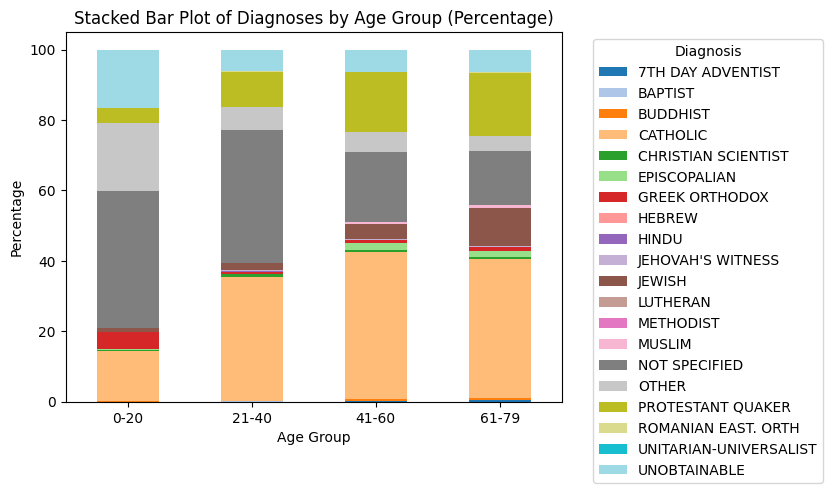

In [75]:
age_religion_counts = df_b.groupby(['age_group', 'religion'], observed = False).size().unstack().fillna(0)
age_religion_percents = age_religion_counts.div(age_religion_counts.sum(axis=1), axis=0) * 100

age_religion_counts.plot(kind='bar', stacked=True, colormap = 'tab20')
plt.title('Stacked Bar Plot of Diagnoses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_religion_percents.plot(kind='bar', stacked=True, colormap = 'tab20')
plt.title('Stacked Bar Plot of Diagnoses by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

### Time Analysis

In [29]:
df_c = query_c()

print(df_c.head(2))
df_c.info()

             admittime insurance      religion marital_status ethnicity  \
0  2196-04-09 12:26:00   Private  UNOBTAINABLE        MARRIED     WHITE   
1  2153-09-03 07:15:00  Medicare      CATHOLIC        MARRIED     WHITE   

                                           diagnosis  hospital_expire_flag  
0                            BENZODIAZEPINE OVERDOSE                     0  
1  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   admittime             58976 non-null  object
 1   insurance             58976 non-null  object
 2   religion              58518 non-null  object
 3   marital_status        48848 non-null  object
 4   ethnicity             58976 non-null  object
 5   diagnosis             58951 non-null  object
 6   hospital_expire_flag  58976 no

Notice the error in computing the admission time in the dataset. For analysis purposes, years such as "2149" were converted to their 20th century counterpart, like "1949". The addition of a datetime column to our query allows for time series analysis to be conducted: were ICU admissions more common in the daytime or nighttime? Is there a season that sees more ICU admissions than others?

### How do patient outcomes vary by season or time of admission?
### Are there any seaonsal trends in specific diagnoses?

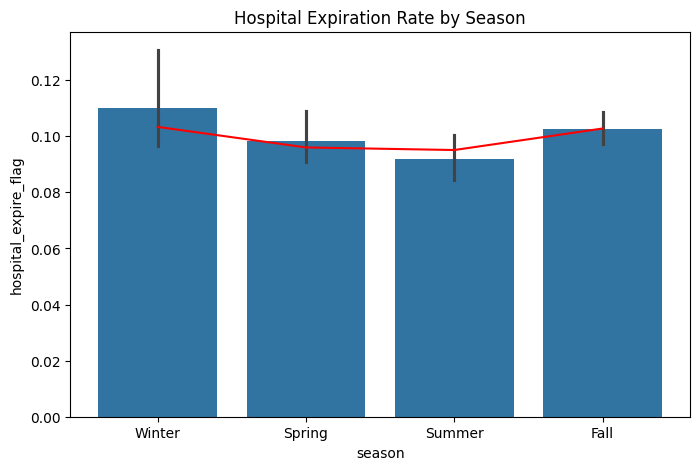

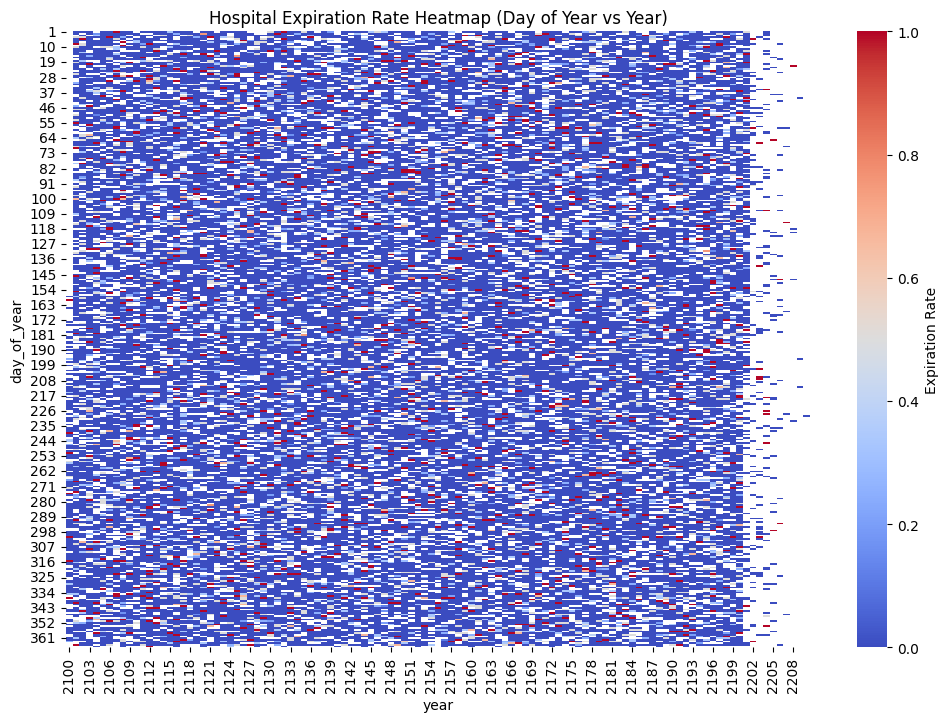

   season  Total Patients  Expired Patients  Percent Mortality Rate (%)
0  Winter           14613              1510                   10.333265
1  Spring           14634              1405                    9.600929
2  Summer           15143              1440                    9.509344
3    Fall           14586              1499                   10.276978


In [30]:
df_c['year'] = pd.to_datetime(df_c['admittime']).dt.year
df_c['month'] = pd.to_datetime(df_c['admittime']).dt.month
df_c['day_of_year'] = pd.to_datetime(df_c['admittime']).dt.dayofyear
df_c['season'] = pd.cut(df_c['month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
day_year_pivot = df_c.pivot_table(index='day_of_year', columns='year', values='hospital_expire_flag', aggfunc='mean')

seasonal_expire_rate_yearly = df_c.groupby(['year', 'season'], observed = False)['hospital_expire_flag'].mean().reset_index()
seasonal_expire_rate = df_c.groupby('season', observed = False)['hospital_expire_flag'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='season', y='hospital_expire_flag', data=seasonal_expire_rate_yearly)
sns.lineplot(x = 'season', y = 'hospital_expire_flag', data = seasonal_expire_rate, color = 'red')
plt.title('Hospital Expiration Rate by Season')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(day_year_pivot, cmap='coolwarm', cbar_kws={'label': 'Expiration Rate'})
plt.title('Hospital Expiration Rate Heatmap (Day of Year vs Year)')
plt.show()

seasonal_summary = df_c.groupby('season', observed = False).agg(
    total_patients=('hospital_expire_flag', 'size'),  # patients per season
    expired_patients=('hospital_expire_flag', 'sum')  # expired patients per season
).reset_index()
seasonal_summary['mortality_rate'] = (seasonal_summary['expired_patients'] / seasonal_summary['total_patients']) * 100

print(seasonal_summary[['season', 'total_patients', 'expired_patients', 'mortality_rate']].rename(
    columns={
        'total_patients': 'Total Patients',
        'expired_patients': 'Expired Patients',
        'mortality_rate': 'Percent Mortality Rate (%)'
    }
))

[no significant trends in season, can confirm by non-normal anovas (wilcox?)]

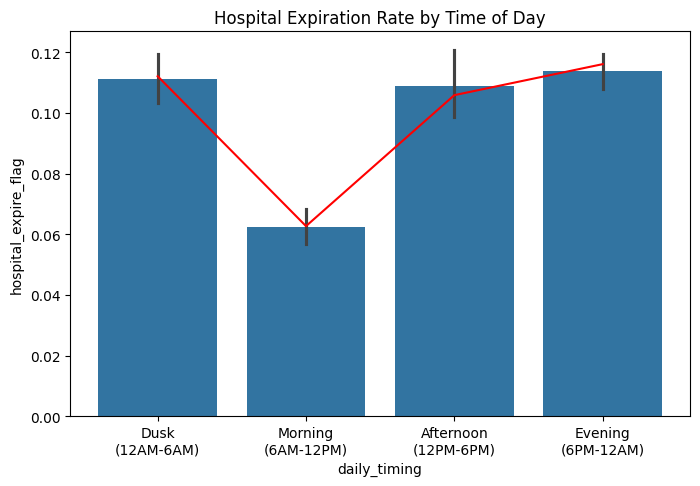

            daily_timing  Total Patients  Expired Patients  \
0       Dusk\n(12AM-6AM)            9973              1118   
1    Morning\n(6AM-12PM)           14129               886   
2  Afternoon\n(12PM-6PM)           19429              2057   
3    Evening\n(6PM-12AM)           15445              1793   

   Percent Mortality Rate (%)  
0                   11.210268  
1                    6.270791  
2                   10.587266  
3                   11.608935  


In [32]:
df_c['hour'] = pd.to_datetime(df_c['admittime']).dt.hour
df_c['daily_timing'] = pd.cut(df_c['hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk\n(12AM-6AM)', 'Morning\n(6AM-12PM)', 'Afternoon\n(12PM-6PM)', 'Evening\n(6PM-12AM)'], 
                        include_lowest=True)

daily_expire_rate_yearly = df_c.groupby(['year', 'daily_timing'], observed = False)['hospital_expire_flag'].mean().reset_index()
daily_expire_rate = df_c.groupby('daily_timing', observed = False)['hospital_expire_flag'].mean().reset_index()

plt.figure(figsize = (8,5))
sns.barplot(x = 'daily_timing', y = 'hospital_expire_flag', data = daily_expire_rate_yearly)
sns.lineplot(x = 'daily_timing', y = 'hospital_expire_flag', data = daily_expire_rate, color = 'red')
plt.title('Hospital Expiration Rate by Time of Day')
plt.show()

daily_summary = df_c.groupby('daily_timing', observed = False).agg(
    total_patients = ('hospital_expire_flag', 'size'),
    expired_patients = ('hospital_expire_flag', 'sum')
).reset_index()
daily_summary['mortality_rate'] = daily_summary['expired_patients'] / daily_summary['total_patients'] * 100

print(daily_summary[['daily_timing', 'total_patients', 'expired_patients', 'mortality_rate']].rename(
    columns={
        'total_patients': 'Total Patients',
        'expired_patients': 'Expired Patients',
        'mortality_rate': 'Percent Mortality Rate (%)'
    }
))

[trends about regarding morning - fewest admitted patients]

### Predictions of Patient Readmission

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
### What key features identify a patient as being high risk for readmission?

df_d = query_d()
# takes 90m1.6s?

In [4]:
df_d['diagnosis_category'] = mapped_diagnosis(df_d['diagnosis'])

In [5]:
print(df_d.head(2))
df_d.info()

  gender  age admission_type            admittime            dischtime  \
0      M   40      EMERGENCY  2170-11-05 11:04:00  2170-11-27 18:00:00   
1      M   80       ELECTIVE  2128-06-23 18:26:00  2128-06-27 12:31:00   

                                      diagnosis     los  readmission_flag  \
0                      SEPSIS;PILONIDAL ABSCESS  3.2788                 0   
1  CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT  2.8939                 0   

      diagnosis_category  
0             Infections  
1  Cardiovascular Issues  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54923 entries, 0 to 54922
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              54923 non-null  object 
 1   age                 54923 non-null  int64  
 2   admission_type      54923 non-null  object 
 3   admittime           54923 non-null  object 
 4   dischtime           54923 non-null  object 
 5   diagnosi

In [6]:
# readmission_flag = patient will be readmitted within 30 days of this ICU admission
### preprocessing data
df_d['admit_month'] = pd.to_datetime(df_d['admittime']).dt.month
df_d['admit_day_of_year'] = pd.to_datetime(df_d['admittime']).dt.dayofyear
df_d['admit_season'] = pd.cut(df_d['admit_month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
df_d['admit_hour'] = pd.to_datetime(df_d['admittime']).dt.hour
df_d['admit_timing'] = pd.cut(df_d['admit_hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk', 'Morning', 'Afternoon', 'Evening'], 
                        include_lowest=True)

df_d['disch_month'] = pd.to_datetime(df_d['dischtime']).dt.month
df_d['disch_day_of_year'] = pd.to_datetime(df_d['admittime']).dt.dayofyear
df_d['disch_season'] = pd.cut(df_d['disch_month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
df_d['disch_hour'] = pd.to_datetime(df_d['dischtime']).dt.hour
df_d['disch_timing'] = pd.cut(df_d['disch_hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk', 'Morning', 'Afternoon', 'Evening'], 
                        include_lowest=True)

df_d = df_d.drop(labels = ['admittime', 'dischtime', 'diagnosis', 'admit_month', 'disch_month', 'admit_hour', 'disch_hour'], axis = 1)
df_d = pd.get_dummies(df_d, columns = ['admission_type', 'gender', 'diagnosis_category', 'admit_timing', 'disch_timing', 'admit_season', 'disch_season'])

In [7]:
from sklearn.model_selection import GridSearchCV

df_d_no_nan = df_d[df_d['los'].notnull()]

X = df_d_no_nan.drop('readmission_flag', axis=1)
y = df_d_no_nan['readmission_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify= y)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cholesky', 'liblinear']} # iterate over inverse  of regularization strength (C) and solver
model = GridSearchCV(LogisticRegression(penalty = 'l2', max_iter = 100000, class_weight = 'balanced'), param_grid, scoring = 'f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Best hyperparameters used in this logistic regression model with all features:")
print(model.best_params_)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

## all features included is kind of bad, not very accurate. see below for feature selection

Best hyperparameters used in this logistic regression model with all features:
{'C': 0.1, 'solver': 'liblinear'}
[[6781 6066]
 [ 295  587]]
              precision    recall  f1-score   support

           0       0.96      0.53      0.68     12847
           1       0.09      0.67      0.16       882

    accuracy                           0.54     13729
   macro avg       0.52      0.60      0.42     13729
weighted avg       0.90      0.54      0.65     13729



In [9]:
model = LogisticRegression(C = 0.1, penalty = 'l2', max_iter = 10000, solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

[[6781 6066]
 [ 295  587]]
              precision    recall  f1-score   support

           0       0.96      0.53      0.68     12847
           1       0.09      0.67      0.16       882

    accuracy                           0.54     13729
   macro avg       0.52      0.60      0.42     13729
weighted avg       0.90      0.54      0.65     13729

Average F1 score before SMOTE: 0.15744850062638047


[note that including all features is best, but is still not accurate and does not correctly score people who are readmitted to the hospital]

In [10]:
# decision trees
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_train, y_train)

print("Best hyperparameters used in this decision tree model with all features:")
print(clf.best_params_)

c:\Users\argam\Desktop\Personal Projects\Health Care Analytics\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters used in this decision tree model with all features:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [11]:
# random forest
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(RandomForestClassifier(random_state = 42, class_weight = 'balanced'), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_train, y_train)

print("Best hyperparameters used in this random forest model with all features:")
print(clf.best_params_)

Best hyperparameters used in this random forest model with all features:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}


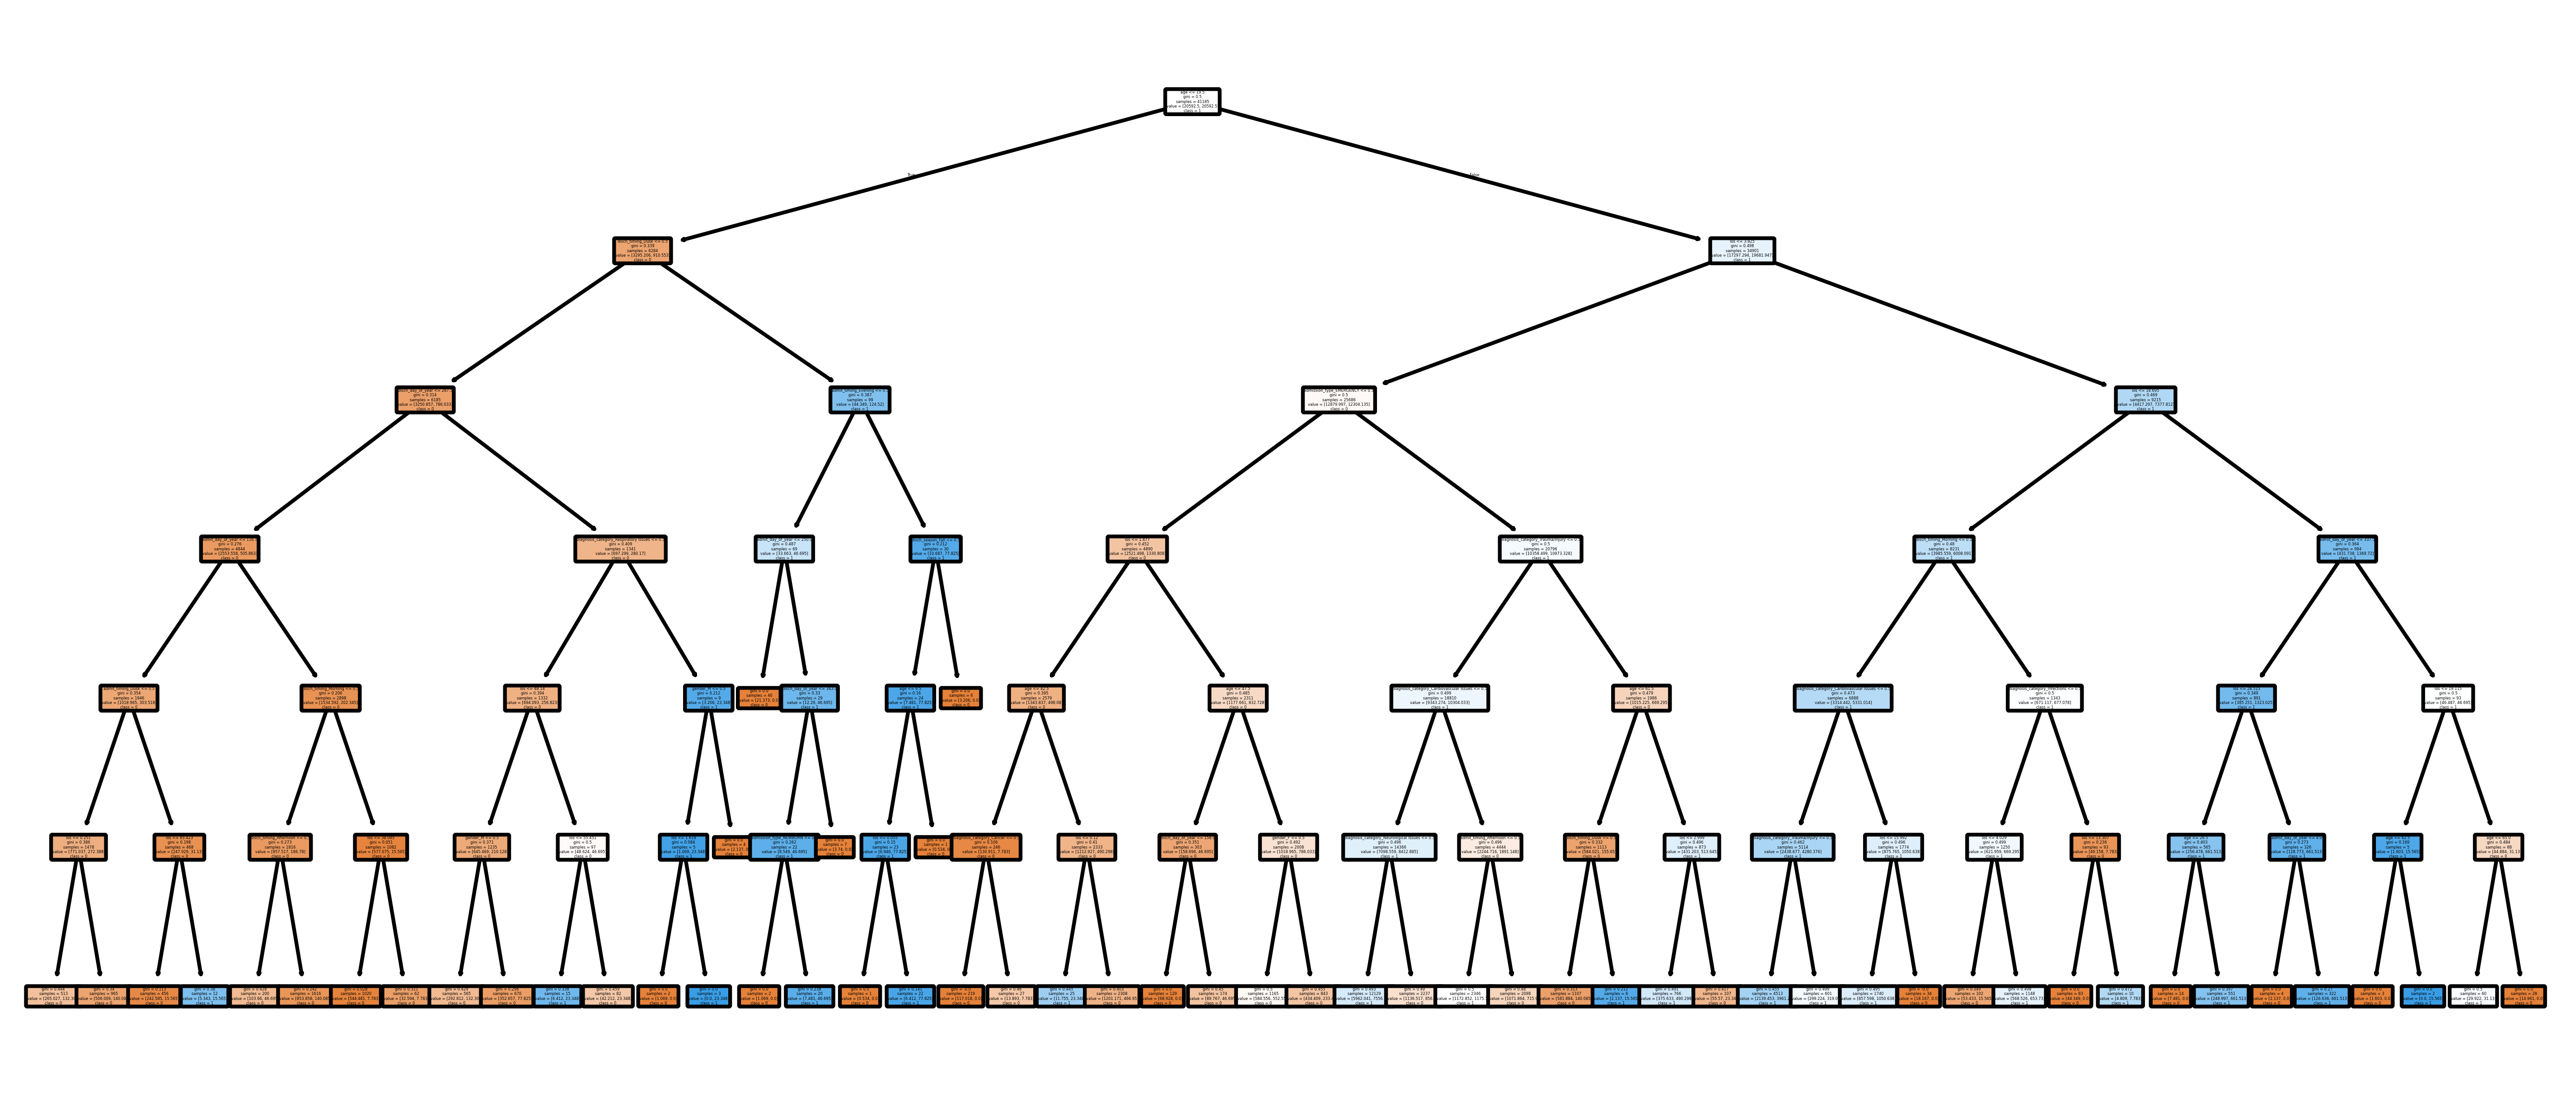

[[5421 7426]
 [ 188  694]]
              precision    recall  f1-score   support

           0       0.97      0.42      0.59     12847
           1       0.09      0.79      0.15       882

    accuracy                           0.45     13729
   macro avg       0.53      0.60      0.37     13729
weighted avg       0.91      0.45      0.56     13729

Average F1 score before SMOTE: 0.1554271082638431


In [12]:
clf = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 6,
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             random_state = 42,
                             class_weight = 'balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_train.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

In [13]:
rf = RandomForestClassifier(max_depth = 6,
                            random_state = 42,
                            min_samples_leaf = 4,
                            min_samples_split = 10,
                            class_weight = 'balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

[[5967 6880]
 [ 215  667]]
              precision    recall  f1-score   support

           0       0.97      0.46      0.63     12847
           1       0.09      0.76      0.16       882

    accuracy                           0.48     13729
   macro avg       0.53      0.61      0.39     13729
weighted avg       0.91      0.48      0.60     13729

Average F1 score before SMOTE: 0.15745150077538703


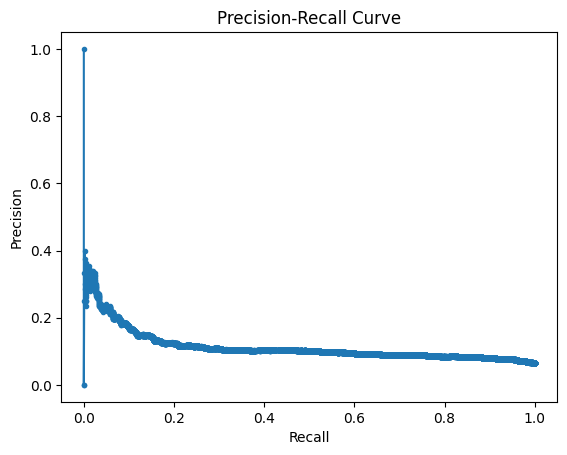

AUC-ROC: 0.6515712924852357
Average F1 score before SMOTE: 0.15745150077538703


In [14]:
from sklearn.metrics import precision_recall_curve, roc_auc_score

y_pred_proba = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)

f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

In [15]:
# above models attempted tackling the dataset out of box
# 6% of the testing dataset are 1's meaning that we need
# to create more 1's in the training dataset to compare
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [16]:
# logistic regression

model = LogisticRegression(C = 0.1, penalty = 'l2', max_iter = 10000, solver = 'liblinear', class_weight = None)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(model, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score after SMOTE:", f1_scores_res.mean())

[[12845     2]
 [  882     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12847
           1       0.00      0.00      0.00       882

    accuracy                           0.94     13729
   macro avg       0.47      0.50      0.48     13729
weighted avg       0.88      0.94      0.90     13729

Average F1 score after SMOTE: 0.9407938331556412


In [17]:
# decision tree
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_res, y_res)

print("Best hyperparameters used in this decision tree model with all features:")
print(clf.best_params_)

Best hyperparameters used in this decision tree model with all features:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}


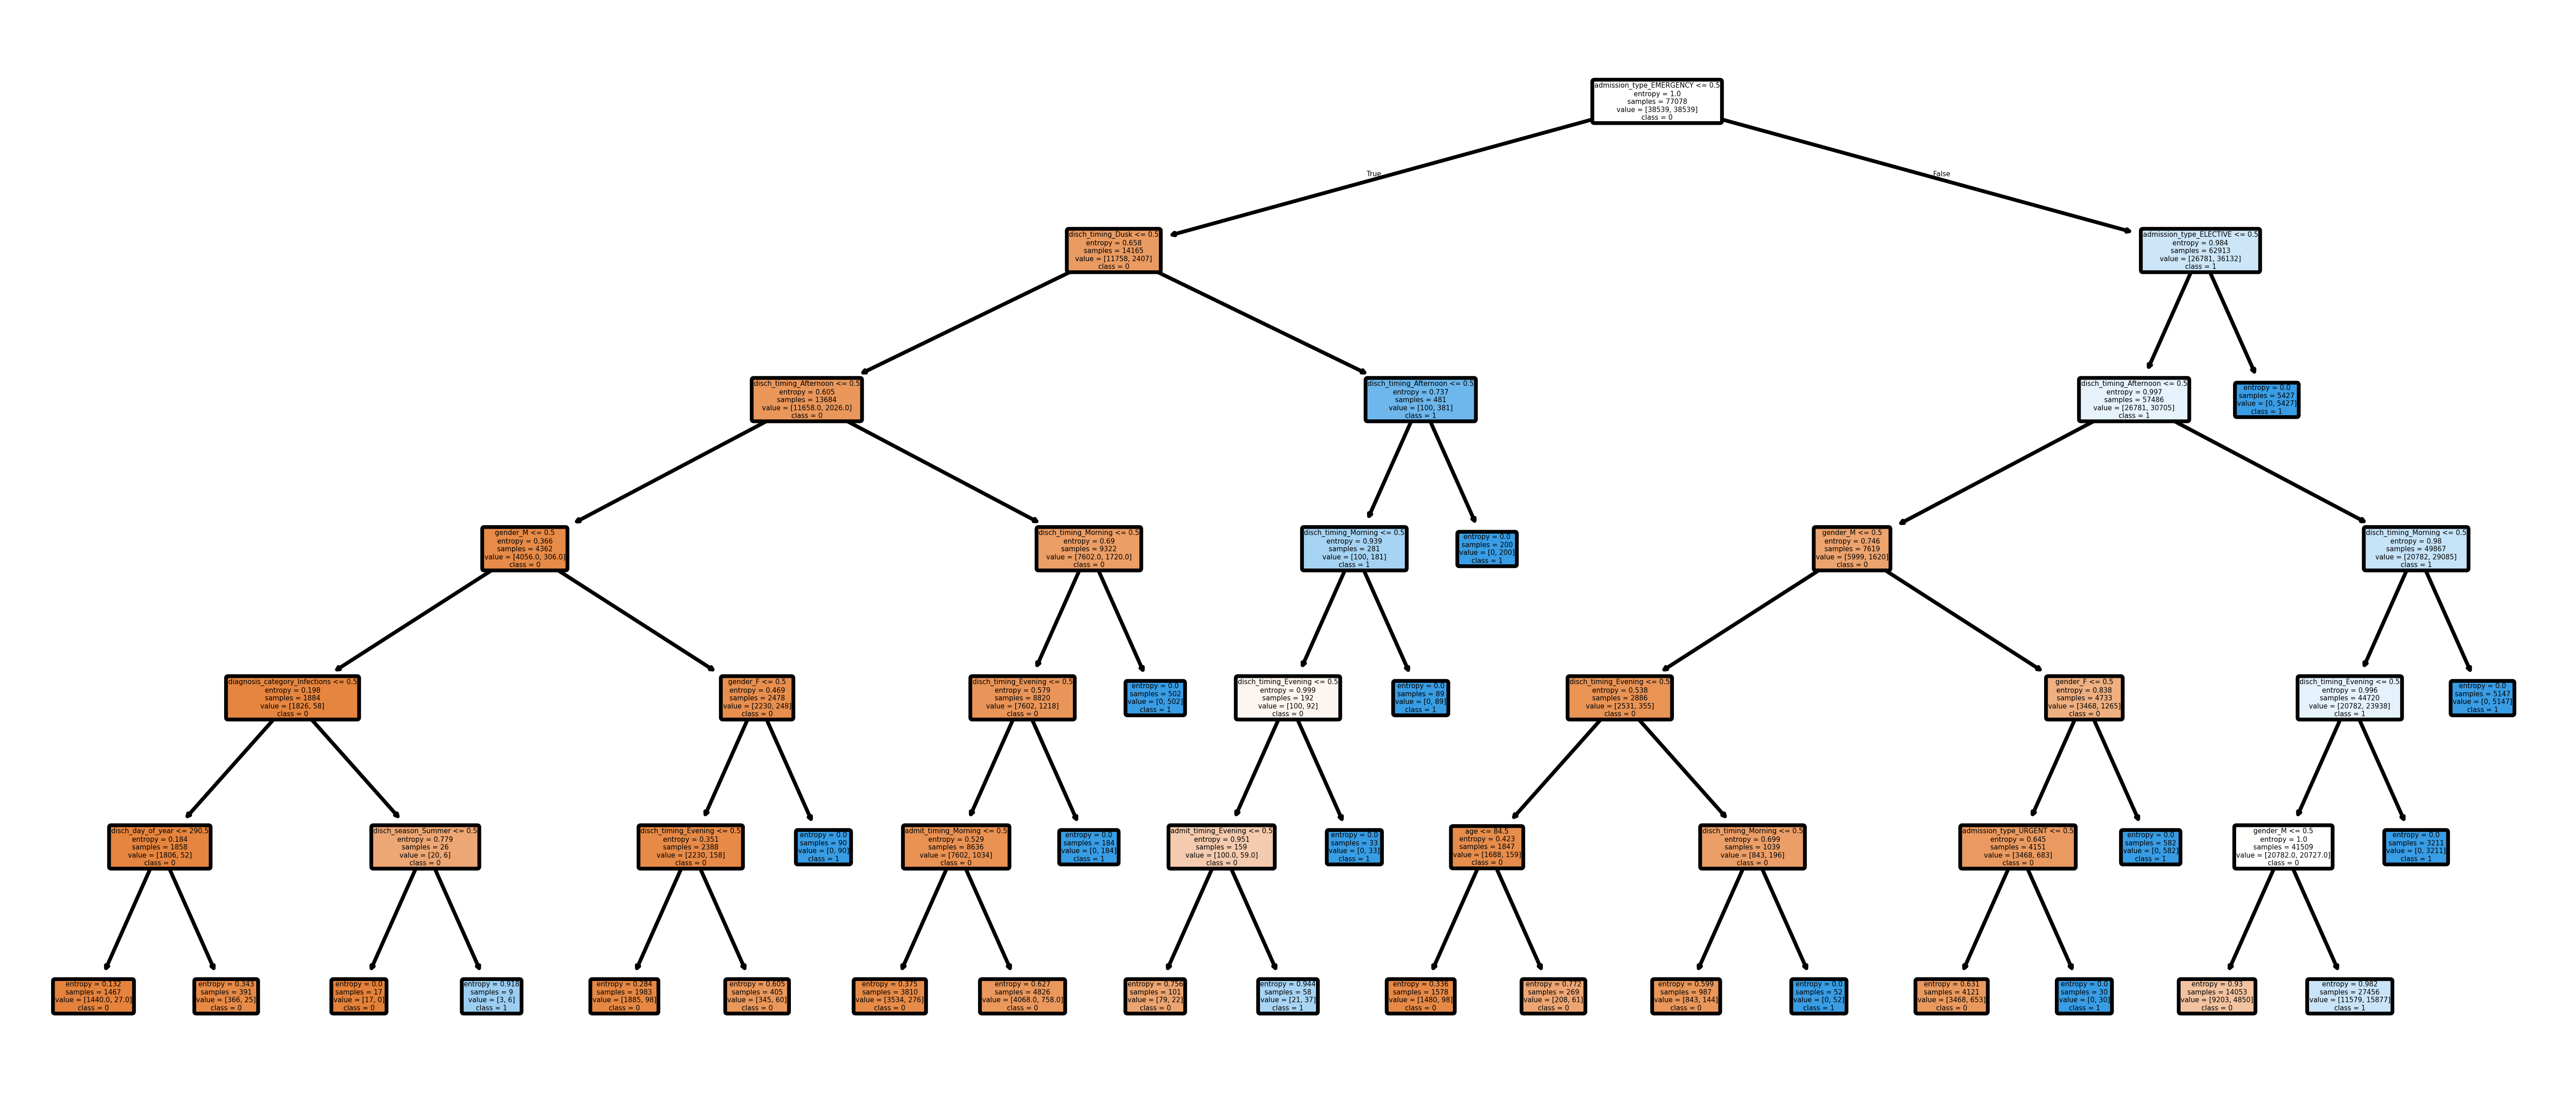

[[9005 3842]
 [ 557  325]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     12847
           1       0.08      0.37      0.13       882

    accuracy                           0.68     13729
   macro avg       0.51      0.53      0.47     13729
weighted avg       0.89      0.68      0.76     13729

Average F1 score after SMOTE: 0.7681105517170794


In [18]:
clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 6,
                             min_samples_leaf = 6,
                             min_samples_split = 2,
                             random_state = 42,
                             class_weight = None)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_res.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(clf, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score after SMOTE:", f1_scores_res.mean())

In [19]:
# random forest

rf = RandomForestClassifier(max_depth=6, random_state=42, min_samples_leaf=4, min_samples_split=10, class_weight=None)
rf.fit(X_res, y_res)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

# prev confusion matrix from rf without SMOTE, class_weight = 'balanced'
#[[5426 7421]
# [ 201  681]]
f1_scores_res = cross_val_score(rf, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score after SMOTE:", f1_scores_res.mean())

[[12104   743]
 [  794    88]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12847
           1       0.11      0.10      0.10       882

    accuracy                           0.89     13729
   macro avg       0.52      0.52      0.52     13729
weighted avg       0.88      0.89      0.89     13729

Average F1 score after SMOTE: 0.8854781249187038


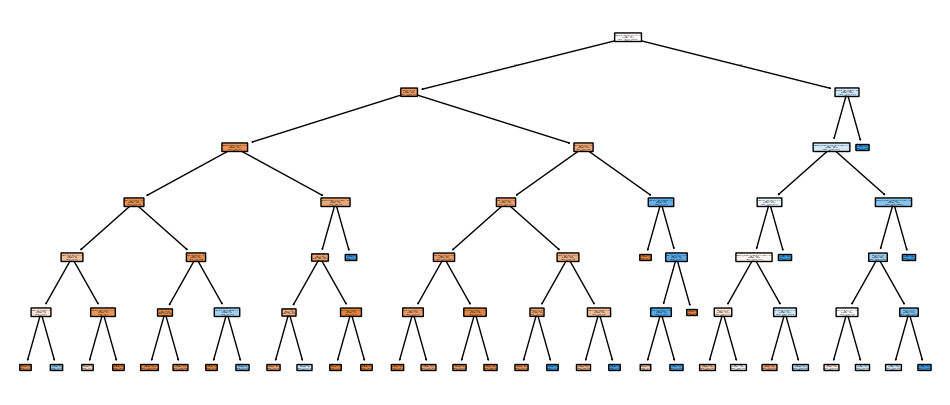

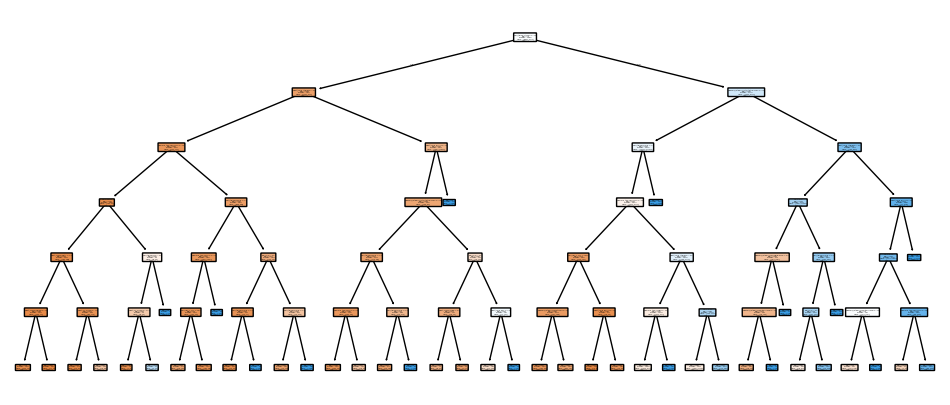

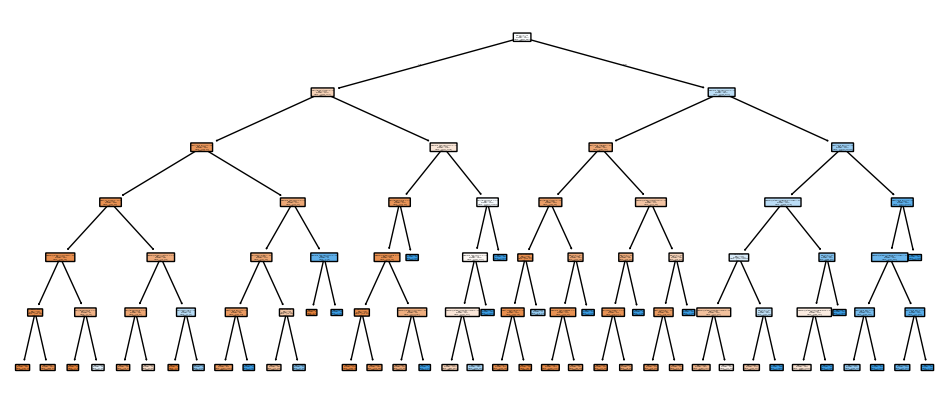

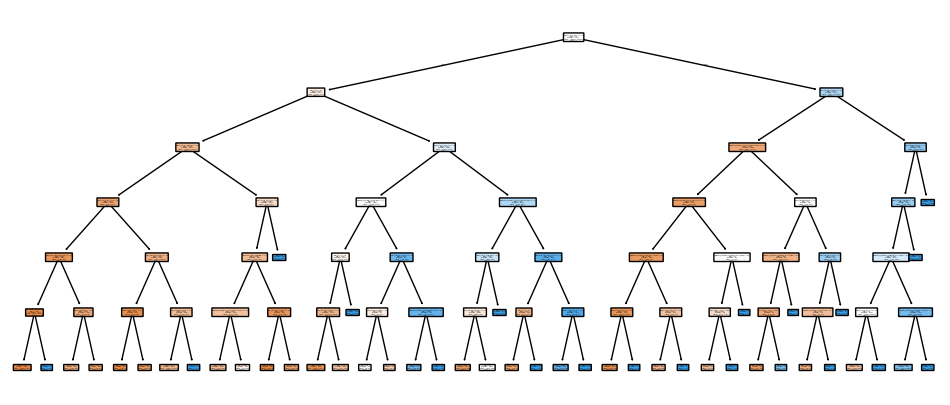

In [20]:
for index in range(0, 4):
    plt.figure(figsize = (12,5))
    plot_tree(rf.estimators_[index], filled = True, feature_names = X_train.columns, class_names = ['0', '1'], rounded = True)
plt.show()


[above are 4 sample decision trees in the random forest. note how random forest regression works by averaging + weighing trees]

In [21]:
# oversampling 1's AND undersampling 0's
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 1.0, random_state = 42)
X_resampled, y_resampled = undersample.fit_resample(X_res, y_res)

In [22]:
# logistic regression

model = LogisticRegression(C = 0.1, penalty = 'l2', max_iter = 10000, solver = 'liblinear', class_weight = None)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score after undersampling 0's and oversampling 1's:", f1_scores_res.mean())

[[12846     1]
 [  882     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12847
           1       0.00      0.00      0.00       882

    accuracy                           0.94     13729
   macro avg       0.47      0.50      0.48     13729
weighted avg       0.88      0.94      0.90     13729

Average F1 score after undersampling 0's and oversampling 1's: 0.9429213945303265


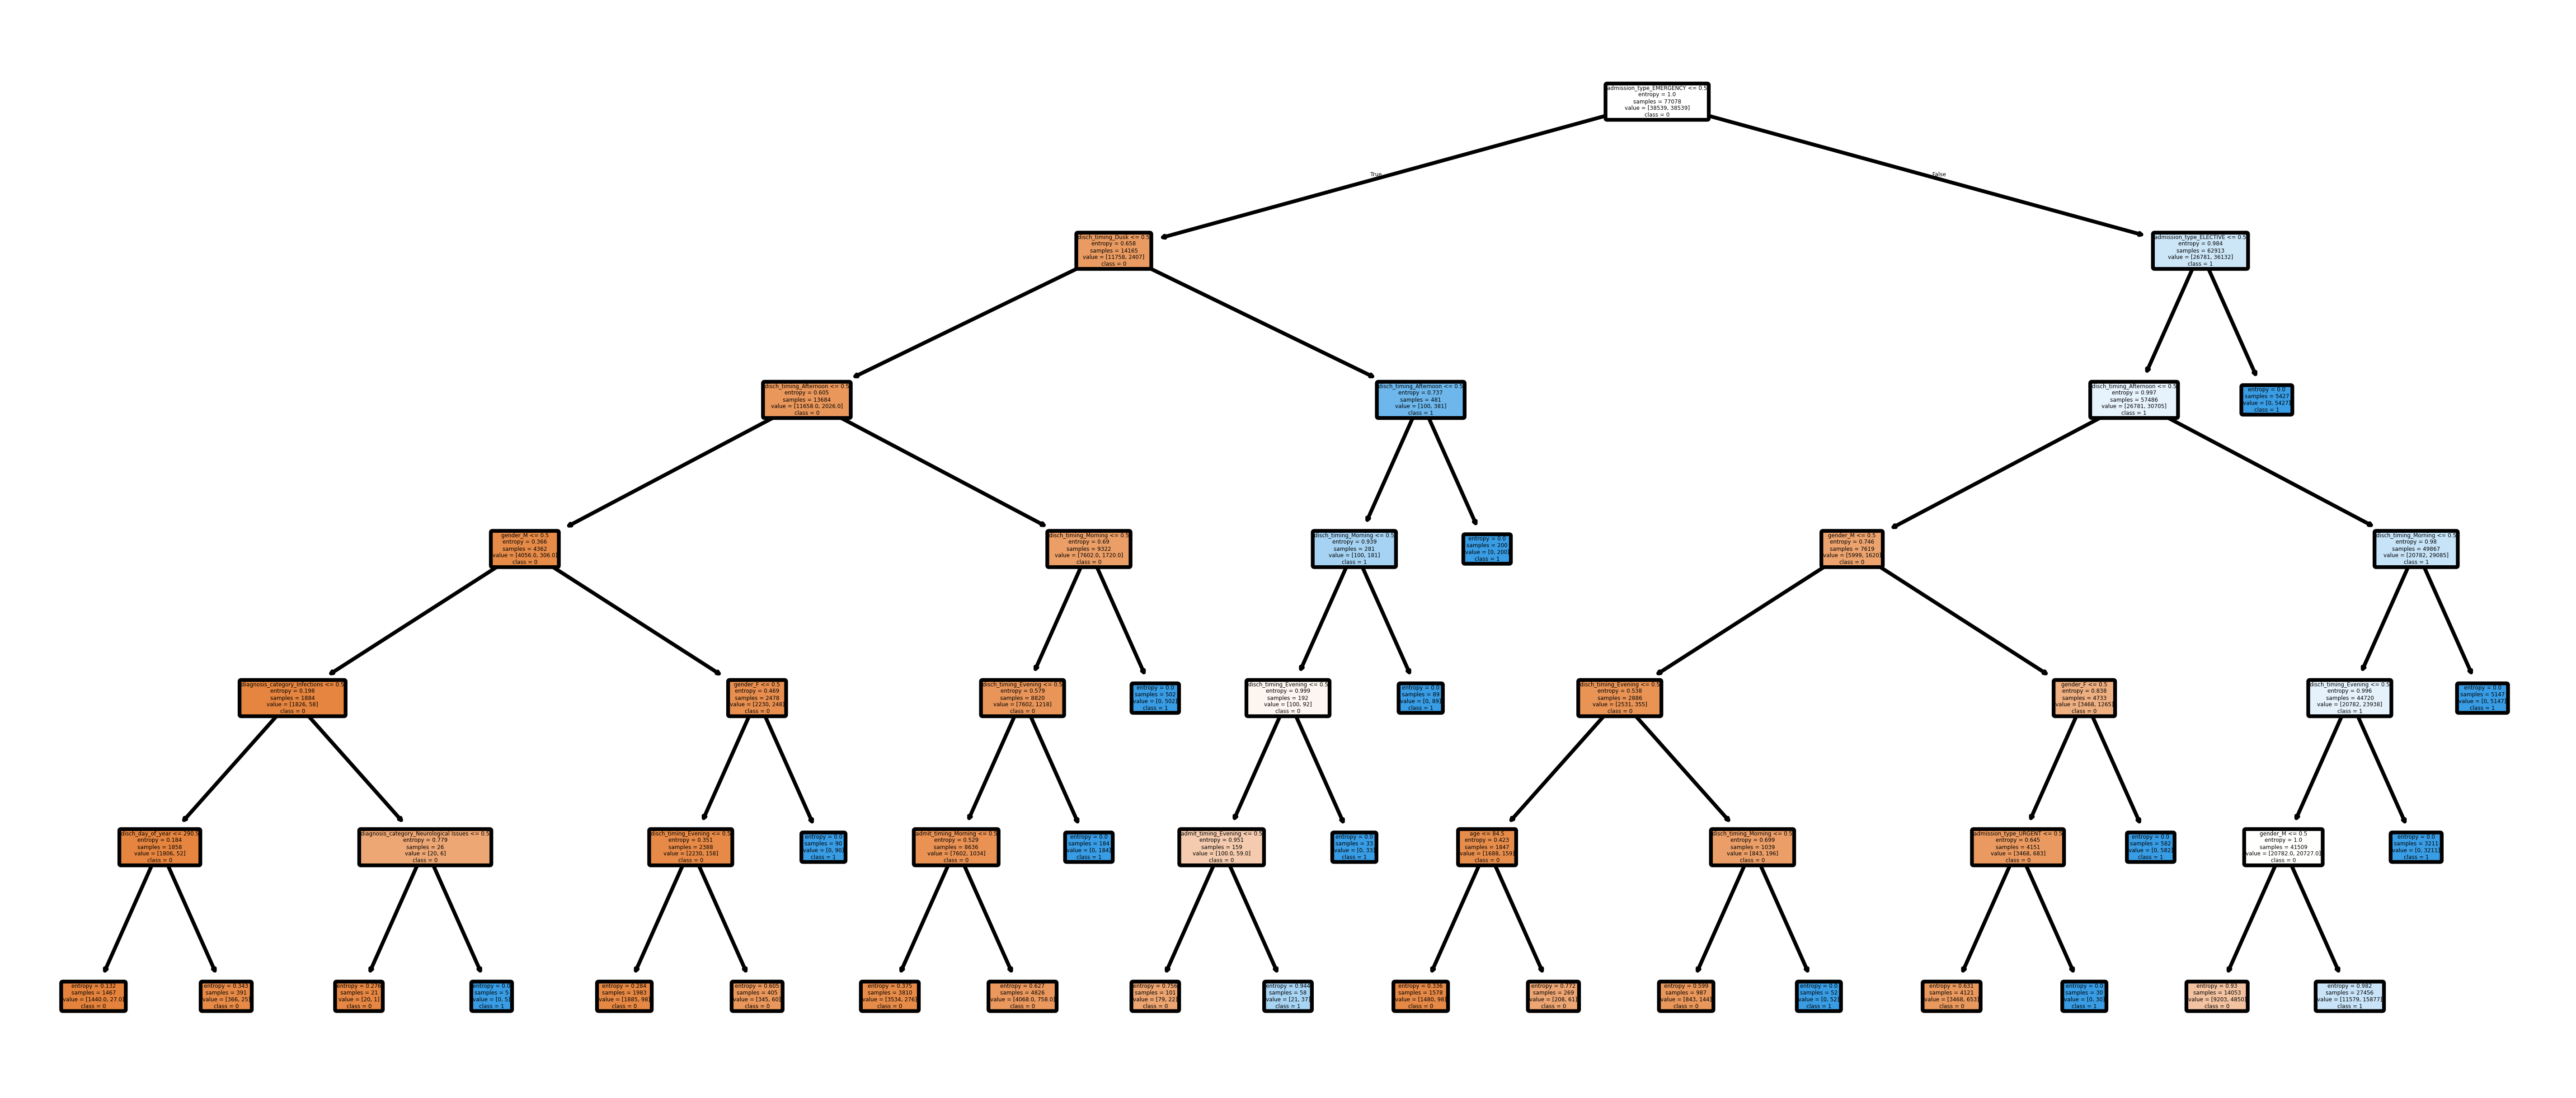

[[9005 3842]
 [ 557  325]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     12847
           1       0.08      0.37      0.13       882

    accuracy                           0.68     13729
   macro avg       0.51      0.53      0.47     13729
weighted avg       0.89      0.68      0.76     13729

Average F1 score after undersampling 0's and oversampling 1's: 0.7703291565268716


In [23]:
# decision tree

clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 6,
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             random_state = 42,
                             class_weight = None)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_resampled.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score after undersampling 0's and oversampling 1's:", f1_scores_res.mean())

In [24]:
# random forest

rf = RandomForestClassifier(max_depth=6, random_state=42, min_samples_leaf=1, min_samples_split=2, class_weight=None)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

f1_scores_res = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score after undersampling 0's and oversampling 1's:", f1_scores_res.mean())

[[12265   582]
 [  810    72]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12847
           1       0.11      0.08      0.09       882

    accuracy                           0.90     13729
   macro avg       0.52      0.52      0.52     13729
weighted avg       0.88      0.90      0.89     13729

Average F1 score after undersampling 0's and oversampling 1's: 0.8913972362910945


In [29]:
print("Summary of average F1 scores:")
df = pd.DataFrame(
    data = {
        "Logistic Regression": [0.157, 0.941, 0.943],
        "Decision Tree": [0.155, 0.768, 0.770],
        "Random Forest": [0.157, 0.885, 0.891]
    },
    index = ['Before SMOTE', 'SMOTE Oversampling 1s', 'SMOTE Undersampling 0s']
)
print(df.to_markdown(stralign = 'center', numalign = 'center'))

Summary of average F1 scores:
|                        |  Logistic Regression  |  Decision Tree  |  Random Forest  |
|:----------------------:|:---------------------:|:---------------:|:---------------:|
|      Before SMOTE      |         0.157         |      0.155      |      0.157      |
| SMOTE Oversampling 1s  |         0.941         |      0.768      |      0.885      |
| SMOTE Undersampling 0s |         0.943         |      0.77       |      0.891      |


In [30]:
print("Summary of average accuracy:")
df = pd.DataFrame(
    data = {
        "Logistic Regression": ['54%', '94%', '94%'],
        "Decision Tree": ['45%', '68%', '68%'],
        "Random Forest": ['48%', '89%', '90%']
    },
    index = ['Before SMOTE', 'SMOTE Oversampling 1s', 'SMOTE Undersampling 0s']
)
print(df.to_markdown(stralign = 'center', numalign = 'center'))

Summary of average accuracy:
|                        |  Logistic Regression  |  Decision Tree  |  Random Forest  |
|:----------------------:|:---------------------:|:---------------:|:---------------:|
|      Before SMOTE      |          54%          |       45%       |       48%       |
| SMOTE Oversampling 1s  |          94%          |       68%       |       89%       |
| SMOTE Undersampling 0s |          94%          |       68%       |       90%       |


In [241]:
## idk
# captions:
#txt = "string"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

100


'\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\nprecision = cm[1][1] / (cm[1][1] + cm[0][1])\nrecall = cm[1][1] / (cm[1][1] + cm[1][0])\naccuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])\nf1 = 2*cm[1][1] / (2*cm[1][1] + cm[0][1] + cm[1][0])\n\nprint(f"Precision: {precision:.2%}")\nprint(f"Recall: {recall:.2%}")\nprint(f"Accuracy: {accuracy:.2%}")\nprint(f"F1: {f1:.2%}")\n'

gonna make a ML model that assess whether a patient is likely for readmission given certain features about them

random forest? logistic regression? whata re some other models I can look at? // elbow test ... (specific diagnoses <- male patient comes in at 3pm on saturday, what is the highest likelihood for this to be classified as --> corr not caus) ** looking for one big bend


## Results and Discussion

[more words go here]

## Supplemental Figures